# PyMOL image generation

In [1]:
import sys, os, time
from Bio import SeqIO
import pandas as pd

## ColabFold - run on GADI supercomputer

<b>Settings:</b>  
* amber relax
* num relax = 1
* use GPU relax

## Run pdb2pqr

### First align structures to AtSAL1_updated

In [8]:
import __main__
__main__.pymol_argv = ['pymol', '-qc']

import os
import pymolPy3

pm = pymolPy3.pymolPy3()

# Import files inc AtSAL1
# assign directory

directory = f'/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/'
output_dir = f'/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/'

AtSAL1_pdb = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/AtSAL1_updated/AtSAL1_updated.pdb'


"""
Structures need to be aligned BEFORE electrostatics
"""


# iterate over files in directory
for filename in os.listdir(directory):
    basename = os.path.basename(filename)
    f = os.path.join(directory, filename)

    # checking if it is a file, create short name
    if os.path.isfile(f):
        shortname = basename.split('.')[0]

        # load structure
        pm(f"load {f}")

        # Load AtSAL1 reference
        pm(f"load {AtSAL1_pdb}")
        pm('set_name AtSAL1_updated, AtSAL1_updated_pdb')

        pm("set_view (\
        0.980755210,   -0.023148270,   -0.193854913,\
        0.162131056,   -0.456586570,    0.874780297,\
        -0.108762056,   -0.889374375,   -0.444051415,\
        0.000122931,   -0.000242302,  -56.248649597,\
        -32.444423676,  -39.579414368,   -9.259656906,\
        44.643768311,   67.851081848,  -20.000000000 )")
        
        # set structure name
        pdb = f"{shortname}"

        # Align 
        pm(f"align {pdb}, AtSAL1_updated_pdb")    



        # Remove AtSAL1 reference from the session
        pm("delete AtSAL1_updated_pdb")

        # Save file
        pm(f"save {output_dir}{basename}, {pdb}")

        # Clear
        pm("reinitialize")


<string>:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses


 PyMOL(TM) Molecular Graphics System, Version 2.3.0.
 Copyright (c) Schrodinger, LLC.
 All Rights Reserved.
 
    Created by Warren L. DeLano, Ph.D. 
 
    PyMOL is user-supported open-source software.  Although some versions
    are freely available, PyMOL is not in the public domain.
 
    If PyMOL is helpful in your work or study, then please volunteer 
    support for our ongoing efforts to create open and affordable scientific
    software by purchasing a PyMOL Maintenance and/or Support subscription.

    More information can be found at "http://www.pymol.org".
 
    Enter "help" for a list of commands.
    Enter "help <command-name>" for information on a specific command.

 Hit ESC anytime to toggle between text and graphics.

 Detected OpenGL version 3.1. Shaders available.
 Geometry shaders not available
 Detected GLSL version 1.40.
 OpenGL graphics engine:
  GL_VENDOR:   Mesa/X.org
  GL_RENDERER: llvmpipe (LLVM 12.0.0, 256 bits)
  GL_VERSION:  3.1 Mesa 21.2.6
 Detected 48 CPU

In [11]:
pm(f"save {output_dir}{basename}, {pdb}")

<string>:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses


### pdb2pqr

In [9]:
# assign directory
ph = [(7.0,'7_0'), (7.3,'7_3'), (7.6,'7_6'), (7.9,'7_9'), (8.2,'8_2')]
directory = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/'

for i in ph:
    # Make dir
    os.system(f"mkdir {directory}pdb2pqr_pH{i[1]}") 
    output_dir = f"{directory}pdb2pqr_pH{i[1]}"

    # iterate over files in directory
    for filename in os.listdir(directory):
        basename = os.path.basename(filename)
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            if f.endswith(".pdb"):
                shortname = basename.split('.')[0]

                # Run pdb2pqr locally 
                os.system(f"pdb2pqr --titration-state-method propka --with-ph {i[0]} --ff=AMBER {f} {output_dir}/{shortname}.pqr")
                print(f"\npH: {i[0]}\tname: {shortname}\n")

INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/74987.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 352 residues and 5354 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:This biomolecule is clean.  No repair needed.
INFO:Updating disulfide bridges.
INFO:Debumping biomolecule.
INFO:Assigning titration states with PROPKA.
INFO:
propka3.5.1                             


pH: 7.0	name: 74987



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/1ka1_hal2.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 354 residues and 2718 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:Attempting to repair 17 missing atoms in biomolecule.
INFO:Added atom CB to residue LYS A 32 at coordinates -45.594, -33.973, -23.265
INFO:Added atom CG to residue LYS A 32 at coordinates -45.15


pH: 7.0	name: 1ka1_hal2



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/AtSAL1_updated.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 352 residues and 2628 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:Attempting to repair 1 missing atoms in biomolecule.
INFO:Added atom OXT to residue ALA A 352 at coordinates -4.698, -13.324, -18.987
INFO:Updating disulfide bridges.
INFO:Debumping biomole


pH: 7.0	name: AtSAL1_updated



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/AtAHL.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 368 residues and 5474 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:This biomolecule is clean.  No repair needed.
INFO:Updating disulfide bridges.
INFO:Debumping biomolecule.
INFO:Assigning titration states with PROPKA.
INFO:
propka3.5.1                             


pH: 7.0	name: AtAHL



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/74987.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 352 residues and 5354 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:This biomolecule is clean.  No repair needed.
INFO:Updating disulfide bridges.
INFO:Debumping biomolecule.
INFO:Assigning titration states with PROPKA.
INFO:
propka3.5.1                             


pH: 7.3	name: 74987



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/1ka1_hal2.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 354 residues and 2718 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:Attempting to repair 17 missing atoms in biomolecule.
INFO:Added atom CB to residue LYS A 32 at coordinates -45.594, -33.973, -23.265
INFO:Added atom CG to residue LYS A 32 at coordinates -45.15


pH: 7.3	name: 1ka1_hal2



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/AtSAL1_updated.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 352 residues and 2628 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:Attempting to repair 1 missing atoms in biomolecule.
INFO:Added atom OXT to residue ALA A 352 at coordinates -4.698, -13.324, -18.987
INFO:Updating disulfide bridges.
INFO:Debumping biomole


pH: 7.3	name: AtSAL1_updated



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/AtAHL.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 368 residues and 5474 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:This biomolecule is clean.  No repair needed.
INFO:Updating disulfide bridges.
INFO:Debumping biomolecule.
INFO:Assigning titration states with PROPKA.
INFO:
propka3.5.1                             


pH: 7.3	name: AtAHL



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/74987.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 352 residues and 5354 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:This biomolecule is clean.  No repair needed.
INFO:Updating disulfide bridges.
INFO:Debumping biomolecule.
INFO:Assigning titration states with PROPKA.
INFO:
propka3.5.1                             


pH: 7.6	name: 74987



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/1ka1_hal2.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 354 residues and 2718 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:Attempting to repair 17 missing atoms in biomolecule.
INFO:Added atom CB to residue LYS A 32 at coordinates -45.594, -33.973, -23.265
INFO:Added atom CG to residue LYS A 32 at coordinates -45.15


pH: 7.6	name: 1ka1_hal2



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/AtSAL1_updated.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 352 residues and 2628 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:Attempting to repair 1 missing atoms in biomolecule.
INFO:Added atom OXT to residue ALA A 352 at coordinates -4.698, -13.324, -18.987
INFO:Updating disulfide bridges.
INFO:Debumping biomole


pH: 7.6	name: AtSAL1_updated



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/AtAHL.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 368 residues and 5474 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:This biomolecule is clean.  No repair needed.
INFO:Updating disulfide bridges.
INFO:Debumping biomolecule.
INFO:Assigning titration states with PROPKA.
INFO:
propka3.5.1                             


pH: 7.6	name: AtAHL



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/74987.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 352 residues and 5354 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:This biomolecule is clean.  No repair needed.
INFO:Updating disulfide bridges.
INFO:Debumping biomolecule.
INFO:Assigning titration states with PROPKA.
INFO:
propka3.5.1                             


pH: 7.9	name: 74987



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/1ka1_hal2.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 354 residues and 2718 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:Attempting to repair 17 missing atoms in biomolecule.
INFO:Added atom CB to residue LYS A 32 at coordinates -45.594, -33.973, -23.265
INFO:Added atom CG to residue LYS A 32 at coordinates -45.15


pH: 7.9	name: 1ka1_hal2



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/AtSAL1_updated.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 352 residues and 2628 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:Attempting to repair 1 missing atoms in biomolecule.
INFO:Added atom OXT to residue ALA A 352 at coordinates -4.698, -13.324, -18.987
INFO:Updating disulfide bridges.
INFO:Debumping biomole


pH: 7.9	name: AtSAL1_updated



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/AtAHL.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 368 residues and 5474 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:This biomolecule is clean.  No repair needed.
INFO:Updating disulfide bridges.
INFO:Debumping biomolecule.
INFO:Assigning titration states with PROPKA.
INFO:
propka3.5.1                             


pH: 7.9	name: AtAHL



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/74987.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 352 residues and 5354 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:This biomolecule is clean.  No repair needed.
INFO:Updating disulfide bridges.
INFO:Debumping biomolecule.
INFO:Assigning titration states with PROPKA.
INFO:
propka3.5.1                             


pH: 8.2	name: 74987



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/1ka1_hal2.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 354 residues and 2718 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:Attempting to repair 17 missing atoms in biomolecule.
INFO:Added atom CB to residue LYS A 32 at coordinates -45.594, -33.973, -23.265
INFO:Added atom CG to residue LYS A 32 at coordinates -45.15


pH: 8.2	name: 1ka1_hal2



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/AtSAL1_updated.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 352 residues and 2628 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:Attempting to repair 1 missing atoms in biomolecule.
INFO:Added atom OXT to residue ALA A 352 at coordinates -4.698, -13.324, -18.987
INFO:Updating disulfide bridges.
INFO:Debumping biomole


pH: 8.2	name: AtSAL1_updated



INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/AtAHL.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 368 residues and 5474 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:This biomolecule is clean.  No repair needed.
INFO:Updating disulfide bridges.
INFO:Debumping biomolecule.
INFO:Assigning titration states with PROPKA.
INFO:
propka3.5.1                             


pH: 8.2	name: AtAHL



INFO:Applying force field to biomolecule states.
INFO:Regenerating headers.
INFO:Regenerating PDB lines.


### Run  (inputgen)

In [10]:
# assign directory
ph = [(7.0,'7_0'), (7.3,'7_3'), (7.6,'7_6'), (7.9,'7_9'), (8.2,'8_2')]

for i in ph:
    directory = f'/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/pdb2pqr_pH{i[1]}'
    # iterate over files in directory
    for filename in os.listdir(directory):
        basename = os.path.basename(filename)
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            if f.endswith(".pqr"):
                shortname = basename.split('-')[0]
                print(f'Processing: pH{i[0]}\t{basename}')
                os.system(f"inputgen {f}")

Processing: pH7.0	AtAHL.pqr
Processing: pH7.0	AtSAL1_updated.pqr
Processing: pH7.0	1ka1_hal2.pqr
Processing: pH7.0	74987.pqr
Processing: pH7.3	AtAHL.pqr
Processing: pH7.3	AtSAL1_updated.pqr
Processing: pH7.3	1ka1_hal2.pqr
Processing: pH7.3	74987.pqr
Processing: pH7.6	AtAHL.pqr
Processing: pH7.6	AtSAL1_updated.pqr
Processing: pH7.6	1ka1_hal2.pqr
Processing: pH7.6	74987.pqr
Processing: pH7.9	AtAHL.pqr
Processing: pH7.9	AtSAL1_updated.pqr
Processing: pH7.9	1ka1_hal2.pqr
Processing: pH7.9	74987.pqr
Processing: pH8.2	AtAHL.pqr
Processing: pH8.2	AtSAL1_updated.pqr
Processing: pH8.2	1ka1_hal2.pqr
Processing: pH8.2	74987.pqr


### Run apbs locally

In [11]:
# assign directory
ph = [(7.0,'7_0'), (7.3,'7_3'), (7.6,'7_6'), (7.9,'7_9'), (8.2,'8_2')]

for i in ph:
    # iterate over files in directory
    directory = f'/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/pdb2pqr_pH{i[1]}'
    os.chdir(f"{directory}")

    for filename in os.listdir(directory):
        basename = os.path.basename(filename)
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            if f.endswith(".in"):
                shortname = basename.split('.')[0]
                print(f'Processing: pH {i[0]}\t{basename}')

                # Runs apbs
                os.system(f"apbs {basename}")
                # Moves and renames file
                os.system(f"mv pot.dx {directory}/{shortname}.dx")
            else:
                pass

Processing: pH 7.0	AtSAL1_updated.in


----------------------------------------------------------------------
    APBS -- Adaptive Poisson-Boltzmann Solver
    Version 3.0
    
    Nathan A. Baker (nathan.baker@pnnl.gov)
    Pacific Northwest National Laboratory
    
    Additional contributing authors listed in the code documentation.
    
    Copyright (c) 2010-2020 Battelle Memorial Institute. Developed at the Pacific
    Northwest National Laboratory, operated by Battelle Memorial Institute, Pacific
    Northwest Division for the U.S. Department of Energy.
    
    Portions Copyright (c) 2002-2010, Washington University in St. Louis.
    Portions Copyright (c) 2002-2020, Nathan A. Baker.
    Portions Copyright (c) 1999-2002, The Regents of the University of California.
    Portions Copyright (c) 1995, Michael Holst.
    All rights reserved.
    
    Redistribution and use in source and binary forms, with or without
    modification, are permitted provided that the following conditi

[focusFillBound()]: WARNING:
    Unusually large potential values
    detected on the focusing boundary!
    Convergence not guaranteed for NPBE/NRPBE calculations!



----------------------------------------
CALCULATION #4: MULTIGRID
  Setting up problem...
  Vpbe_ctor:  Using max ion radius (0 A) for exclusion function
  Debye length:  0 A
  Current memory usage:  970.057 MB total, 1945.352 MB high water
  Using cubic spline charge discretization.
  Grid dimensions: 161 x 161 x 161
  Grid spacings: 0.532 x 0.457 x 0.461
  Grid lengths: 85.176 x 73.182 x 73.711
  Grid center: (-31.682, -38.444, -7.218)
  Multigrid levels: 4
  Molecule ID: 1
  Linearized traditional PBE
  Boundary conditions from focusing
  0 ion species (0.000 M ionic strength):
  Solute dielectric: 2.000
  Solvent dielectric: 2.000
  Using "molecular" surface definition;harmonic average smoothing
  Solvent probe radius: 1.400 A
  Temperature:  298.150 K
  Electrostatic energies will be calculated
  Total electrostatic energy = 3.384338925125E+05 kJ/mol
  Calculating forces...
----------------------------------------
PRINT STATEMENTS

print energy 2 - 1 end
  Local net energy (PE 0)

[focusFillBound()]: WARNING:
    Unusually large potential values
    detected on the focusing boundary!
    Convergence not guaranteed for NPBE/NRPBE calculations!



----------------------------------------
CALCULATION #4: MULTIGRID
  Setting up problem...
  Vpbe_ctor:  Using max ion radius (0 A) for exclusion function
  Debye length:  0 A
  Current memory usage:  931.895 MB total, 1868.851 MB high water
  Using cubic spline charge discretization.
  Grid dimensions: 193 x 129 x 161
  Grid spacings: 0.465 x 0.554 x 0.472
  Grid lengths: 89.273 x 70.925 x 75.511
  Grid center: (-32.145, -40.554, -6.682)
  Multigrid levels: 4
  Molecule ID: 1
  Linearized traditional PBE
  Boundary conditions from focusing
  0 ion species (0.000 M ionic strength):
  Solute dielectric: 2.000
  Solvent dielectric: 2.000
  Using "molecular" surface definition;harmonic average smoothing
  Solvent probe radius: 1.400 A
  Temperature:  298.150 K
  Electrostatic energies will be calculated
  Total electrostatic energy = 3.227705337148E+05 kJ/mol
  Calculating forces...
----------------------------------------
PRINT STATEMENTS

print energy 2 - 1 end
  Local net energy (PE 0)

[focusFillBound()]: WARNING:
    Unusually large potential values
    detected on the focusing boundary!
    Convergence not guaranteed for NPBE/NRPBE calculations!



----------------------------------------
CALCULATION #4: MULTIGRID
  Setting up problem...
  Vpbe_ctor:  Using max ion radius (0 A) for exclusion function
  Debye length:  0 A
  Current memory usage:  970.052 MB total, 1945.342 MB high water
  Using cubic spline charge discretization.
  Grid dimensions: 161 x 161 x 161
  Grid spacings: 0.532 x 0.457 x 0.461
  Grid lengths: 85.176 x 73.182 x 73.711
  Grid center: (-31.682, -38.444, -7.218)
  Multigrid levels: 4
  Molecule ID: 1
  Linearized traditional PBE
  Boundary conditions from focusing
  0 ion species (0.000 M ionic strength):
  Solute dielectric: 2.000
  Solvent dielectric: 2.000
  Using "molecular" surface definition;harmonic average smoothing
  Solvent probe radius: 1.400 A
  Temperature:  298.150 K
  Electrostatic energies will be calculated
  Total electrostatic energy = 3.401581366045E+05 kJ/mol
  Calculating forces...
----------------------------------------
PRINT STATEMENTS

print energy 2 - 1 end
  Local net energy (PE 0)

[focusFillBound()]: WARNING:
    Unusually large potential values
    detected on the focusing boundary!
    Convergence not guaranteed for NPBE/NRPBE calculations!



----------------------------------------
CALCULATION #4: MULTIGRID
  Setting up problem...
  Vpbe_ctor:  Using max ion radius (0 A) for exclusion function
  Debye length:  0 A
  Current memory usage:  931.895 MB total, 1868.851 MB high water
  Using cubic spline charge discretization.
  Grid dimensions: 193 x 129 x 161
  Grid spacings: 0.465 x 0.554 x 0.472
  Grid lengths: 89.273 x 70.925 x 75.511
  Grid center: (-32.145, -40.554, -6.682)
  Multigrid levels: 4
  Molecule ID: 1
  Linearized traditional PBE
  Boundary conditions from focusing
  0 ion species (0.000 M ionic strength):
  Solute dielectric: 2.000
  Solvent dielectric: 2.000
  Using "molecular" surface definition;harmonic average smoothing
  Solvent probe radius: 1.400 A
  Temperature:  298.150 K
  Electrostatic energies will be calculated
  Total electrostatic energy = 3.227705337148E+05 kJ/mol
  Calculating forces...
----------------------------------------
PRINT STATEMENTS

print energy 2 - 1 end
  Local net energy (PE 0)

[focusFillBound()]: WARNING:
    Unusually large potential values
    detected on the focusing boundary!
    Convergence not guaranteed for NPBE/NRPBE calculations!



----------------------------------------
CALCULATION #4: MULTIGRID
  Setting up problem...
  Vpbe_ctor:  Using max ion radius (0 A) for exclusion function
  Debye length:  0 A
  Current memory usage:  970.052 MB total, 1945.342 MB high water
  Using cubic spline charge discretization.
  Grid dimensions: 161 x 161 x 161
  Grid spacings: 0.532 x 0.457 x 0.461
  Grid lengths: 85.176 x 73.182 x 73.711
  Grid center: (-31.682, -38.444, -7.218)
  Multigrid levels: 4
  Molecule ID: 1
  Linearized traditional PBE
  Boundary conditions from focusing
  0 ion species (0.000 M ionic strength):
  Solute dielectric: 2.000
  Solvent dielectric: 2.000
  Using "molecular" surface definition;harmonic average smoothing
  Solvent probe radius: 1.400 A
  Temperature:  298.150 K
  Electrostatic energies will be calculated
  Total electrostatic energy = 3.401581366045E+05 kJ/mol
  Calculating forces...
----------------------------------------
PRINT STATEMENTS

print energy 2 - 1 end
  Local net energy (PE 0)

[focusFillBound()]: WARNING:
    Unusually large potential values
    detected on the focusing boundary!
    Convergence not guaranteed for NPBE/NRPBE calculations!



----------------------------------------
CALCULATION #4: MULTIGRID
  Setting up problem...
  Vpbe_ctor:  Using max ion radius (0 A) for exclusion function
  Debye length:  0 A
  Current memory usage:  931.895 MB total, 1868.851 MB high water
  Using cubic spline charge discretization.
  Grid dimensions: 193 x 129 x 161
  Grid spacings: 0.465 x 0.554 x 0.472
  Grid lengths: 89.273 x 70.925 x 75.511
  Grid center: (-32.145, -40.554, -6.682)
  Multigrid levels: 4
  Molecule ID: 1
  Linearized traditional PBE
  Boundary conditions from focusing
  0 ion species (0.000 M ionic strength):
  Solute dielectric: 2.000
  Solvent dielectric: 2.000
  Using "molecular" surface definition;harmonic average smoothing
  Solvent probe radius: 1.400 A
  Temperature:  298.150 K
  Electrostatic energies will be calculated
  Total electrostatic energy = 3.227705337148E+05 kJ/mol
  Calculating forces...
----------------------------------------
PRINT STATEMENTS

print energy 2 - 1 end
  Local net energy (PE 0)

[focusFillBound()]: WARNING:
    Unusually large potential values
    detected on the focusing boundary!
    Convergence not guaranteed for NPBE/NRPBE calculations!



----------------------------------------
CALCULATION #4: MULTIGRID
  Setting up problem...
  Vpbe_ctor:  Using max ion radius (0 A) for exclusion function
  Debye length:  0 A
  Current memory usage:  970.052 MB total, 1945.342 MB high water
  Using cubic spline charge discretization.
  Grid dimensions: 161 x 161 x 161
  Grid spacings: 0.532 x 0.457 x 0.461
  Grid lengths: 85.176 x 73.182 x 73.711
  Grid center: (-31.682, -38.444, -7.218)
  Multigrid levels: 4
  Molecule ID: 1
  Linearized traditional PBE
  Boundary conditions from focusing
  0 ion species (0.000 M ionic strength):
  Solute dielectric: 2.000
  Solvent dielectric: 2.000
  Using "molecular" surface definition;harmonic average smoothing
  Solvent probe radius: 1.400 A
  Temperature:  298.150 K
  Electrostatic energies will be calculated
  Total electrostatic energy = 3.401581366045E+05 kJ/mol
  Calculating forces...
----------------------------------------
PRINT STATEMENTS

print energy 2 - 1 end
  Local net energy (PE 0)

[focusFillBound()]: WARNING:
    Unusually large potential values
    detected on the focusing boundary!
    Convergence not guaranteed for NPBE/NRPBE calculations!



----------------------------------------
CALCULATION #4: MULTIGRID
  Setting up problem...
  Vpbe_ctor:  Using max ion radius (0 A) for exclusion function
  Debye length:  0 A
  Current memory usage:  931.895 MB total, 1868.851 MB high water
  Using cubic spline charge discretization.
  Grid dimensions: 193 x 129 x 161
  Grid spacings: 0.465 x 0.554 x 0.472
  Grid lengths: 89.273 x 70.925 x 75.511
  Grid center: (-32.145, -40.554, -6.682)
  Multigrid levels: 4
  Molecule ID: 1
  Linearized traditional PBE
  Boundary conditions from focusing
  0 ion species (0.000 M ionic strength):
  Solute dielectric: 2.000
  Solvent dielectric: 2.000
  Using "molecular" surface definition;harmonic average smoothing
  Solvent probe radius: 1.400 A
  Temperature:  298.150 K
  Electrostatic energies will be calculated
  Total electrostatic energy = 3.227705337148E+05 kJ/mol
  Calculating forces...
----------------------------------------
PRINT STATEMENTS

print energy 2 - 1 end
  Local net energy (PE 0)

[focusFillBound()]: WARNING:
    Unusually large potential values
    detected on the focusing boundary!
    Convergence not guaranteed for NPBE/NRPBE calculations!



----------------------------------------
CALCULATION #4: MULTIGRID
  Setting up problem...
  Vpbe_ctor:  Using max ion radius (0 A) for exclusion function
  Debye length:  0 A
  Current memory usage:  970.052 MB total, 1945.342 MB high water
  Using cubic spline charge discretization.
  Grid dimensions: 161 x 161 x 161
  Grid spacings: 0.532 x 0.457 x 0.461
  Grid lengths: 85.176 x 73.182 x 73.711
  Grid center: (-31.682, -38.444, -7.218)
  Multigrid levels: 4
  Molecule ID: 1
  Linearized traditional PBE
  Boundary conditions from focusing
  0 ion species (0.000 M ionic strength):
  Solute dielectric: 2.000
  Solvent dielectric: 2.000
  Using "molecular" surface definition;harmonic average smoothing
  Solvent probe radius: 1.400 A
  Temperature:  298.150 K
  Electrostatic energies will be calculated
  Total electrostatic energy = 3.401581366045E+05 kJ/mol
  Calculating forces...
----------------------------------------
PRINT STATEMENTS

print energy 2 - 1 end
  Local net energy (PE 0)

[focusFillBound()]: WARNING:
    Unusually large potential values
    detected on the focusing boundary!
    Convergence not guaranteed for NPBE/NRPBE calculations!



----------------------------------------
CALCULATION #4: MULTIGRID
  Setting up problem...
  Vpbe_ctor:  Using max ion radius (0 A) for exclusion function
  Debye length:  0 A
  Current memory usage:  784.584 MB total, 1574.584 MB high water
  Using cubic spline charge discretization.
  Grid dimensions: 161 x 129 x 161
  Grid spacings: 0.539 x 0.561 x 0.469
  Grid lengths: 86.223 x 71.869 x 75.065
  Grid center: (-33.059, -42.116, -8.250)
  Multigrid levels: 4
  Molecule ID: 1
  Linearized traditional PBE
  Boundary conditions from focusing
  0 ion species (0.000 M ionic strength):
  Solute dielectric: 2.000
  Solvent dielectric: 2.000
  Using "molecular" surface definition;harmonic average smoothing
  Solvent probe radius: 1.400 A
  Temperature:  298.150 K
  Electrostatic energies will be calculated
  Total electrostatic energy = 2.958456063612E+05 kJ/mol
  Calculating forces...
----------------------------------------
PRINT STATEMENTS

print energy 2 - 1 end
  Local net energy (PE 0)

[focusFillBound()]: WARNING:
    Unusually large potential values
    detected on the focusing boundary!
    Convergence not guaranteed for NPBE/NRPBE calculations!



----------------------------------------
CALCULATION #4: MULTIGRID
  Setting up problem...
  Vpbe_ctor:  Using max ion radius (0 A) for exclusion function
  Debye length:  0 A
  Current memory usage:  931.892 MB total, 1868.846 MB high water
  Using cubic spline charge discretization.
  Grid dimensions: 193 x 129 x 161
  Grid spacings: 0.465 x 0.554 x 0.472
  Grid lengths: 89.273 x 70.925 x 75.511
  Grid center: (-32.145, -40.554, -6.682)
  Multigrid levels: 4
  Molecule ID: 1
  Linearized traditional PBE
  Boundary conditions from focusing
  0 ion species (0.000 M ionic strength):
  Solute dielectric: 2.000
  Solvent dielectric: 2.000
  Using "molecular" surface definition;harmonic average smoothing
  Solvent probe radius: 1.400 A
  Temperature:  298.150 K
  Electrostatic energies will be calculated
  Total electrostatic energy = 3.235314296487E+05 kJ/mol
  Calculating forces...
----------------------------------------
PRINT STATEMENTS

print energy 2 - 1 end
  Local net energy (PE 0)

### PyMol - Generate and save images

In [ ]:
"""
* Opens command line version of pymol
* Loads structure and electrostatics files
* Shows surface charge using a two-colour gradient. Two colours are used to ensure accurate 
machine-readable comparison of continuous data surface charge
* Sets display preferences and saves ray-image
"""


import __main__
__main__.pymol_argv = ['pymol', '-qc']

import os
import pymolPy3

pm = pymolPy3.pymolPy3()
pm("bg white")

# Import files inc AtSAL1
# assign directory
ph = [(7.0,'7_0'), (7.3,'7_3'), (7.6,'7_6'), (7.9,'7_9'), (8.2,'8_2')]

for i in ph:
    # Make dir
    directory = f'/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/'
    output_dir = f'{directory}pdb2pqr_pH{i[1]}/images_v2'
    os.system(f"mkdir {output_dir}") 

    # iterate over files in directory
    for filename in os.listdir(directory):
        # checking if it is a file, create short name
        f = os.path.join(directory, filename)
        if os.path.isfile(f):
            basename = os.path.basename(filename)
            if basename.endswith('.pdb'):
                shortname = basename.split('.')[0]

                # set structure name
                pdb = f"{shortname}_pdb"
                dx = f"{shortname}_dx"

                # load structure
                pm(f"load {f}")
                pm(f"set_name {basename.split('.')[0]}, {pdb}")

                # load dx file
                pm(f"load {directory}pdb2pqr_pH{i[1]}/{shortname.split('.')[0]}.dx")
                pm(f"set_name {shortname.split('.')[0]}, {dx}")

                pm("hide all")

                # Set view
                pm("set_view (\
                0.783801198,   -0.439554513,    0.438685596,\
                -0.517596722,   -0.072069705,    0.852583110,\
                -0.343140632,   -0.895317495,   -0.284001738,\
                0.000009127,   -0.000110667, -110.469139099,\
                -41.782485962,  -34.828662872,   -5.124740601,\
                95.614555359,  118.323310852,  -20.000000000 )")

                pm("bg white")

                # Centre image
                pm("center")         

                # Visualise surface charge
                ramp_name = f'{shortname}_ramp'
                map_name = f'{shortname}_dx'

                pm(f"ramp_new {ramp_name}, {map_name}, [-5, 0, 5], [blue, green]")
                pm(f"set surface_ramp_above_mode, 1, {pdb}")
                pm(f"set surface_color, {ramp_name}, {pdb}")
                pm(f"show surface, {pdb}")

                pm("set max_ups, 0")
                pm("set use_shaders, 0")
                pm("set sphere_mode, 9")
                pm("set specular, 0.0")
                pm("set ray_shadow, 0")


                pm("ray")
                pm(f"png {output_dir}/{shortname}")
                pm("reinitialize")

            else:
                pass

## Cropping images

In [ ]:
import cv2
from IPython.display import Image

In [ ]:
# Image cropping function
def crop_images(img, roi):
    x_min, y_min, x_max, y_max = roi
    return img[y_min:y_max, x_min:x_max]

In [ ]:
# Cropped image coordinates 
roi = (160, 72, 480, 260)

In [ ]:
# iterates through file structure loading images, checking the file and then crops them using crop_images(). Writes to file

ph = [(7.0,'7_0'), (7.3,'7_3'), (7.6,'7_6'), (7.9,'7_9'), (8.2,'8_2')]
files = ['images_v2']

for i in ph:
    for f in files:
        # Make dir
        directory = f'/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/pdb2pqr_pH{i[1]}/{f}'
        output_dir = f"/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/pdb2pqr_pH{i[1]}/{f}/cropped"
        os.system(f"mkdir {output_dir}") 

        # iterate over files in directory
        for filename in os.listdir(directory):
            # checking if it is a file, create short name
            full_file = os.path.join(directory, filename)
            if os.path.isfile(full_file):
                basename = os.path.basename(filename)
                if basename.endswith('.png'):
                    shortname = basename.split('.')[0]


                    #load image
                    img = cv2.imread(full_file, cv2.IMREAD_UNCHANGED)

                    img_cropped = crop_images(img, roi)

                    cv2.imwrite(f"{output_dir}/{shortname}.png", img_cropped)


## Image comparison

### Move and rename images

In [ ]:
import os

In [ ]:
ph = [(7.0,'7_0'), (7.3,'7_3'), (7.6,'7_6'), (7.9,'7_9'), (8.2,'8_2')]

count = 0

for i in ph:
    # Make dir
    base_dir = f'/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/'
    file_dir = f'{base_dir}pdb2pqr_pH{i[1]}/images_v2/cropped'
    output_dir = f'{base_dir}/all_cropped/'

    # iterate over files in directory
    for filename in os.listdir(file_dir):
        # checking if it is a file, create short name
        full_file = os.path.join(file_dir, filename)
        if os.path.isfile(full_file):
            count += 1
            basename = os.path.basename(filename)
            if basename.endswith('.png'):
                shortname = basename.split('.')[0]
                # copy and rename
                os.system(f"cp {file_dir}/{filename} {output_dir}/{shortname}-pH_{i[1]}.png")
print(count)

## Including spatial data

## Image comparison using Earth Mover's Distance (EMD) aka Wasserstein Distance

In [ ]:
import numpy as np
import cv2
import os
import pandas as pd
from scipy.stats import wasserstein_distance
from concurrent.futures import ThreadPoolExecutor, as_completed
import itertools
from tqdm import tqdm
import sys
import multiprocessing

def load_image(path):
    """
    Load an image from the given path.
    
    Args:
    path (str): The path to the image file.
    
    Returns:
    numpy.ndarray: The loaded image, or None if the image could not be loaded.
    """
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None:
        print(f"Error loading image: {path}")
        return None
    return img

def spatial_binning(image, bin_size=(8, 8)):
    """
    Perform spatial binning on an image.
    
    Args:
    image (numpy.ndarray): The image to be binned.
    bin_size (tuple): The size of the bins (rows, columns).
    
    Returns:
    numpy.ndarray: The flattened array of mean color values for each bin.
    """
    height, width, _ = image.shape
    bins_h = np.linspace(0, height, bin_size[0] + 1, dtype=int)
    bins_w = np.linspace(0, width, bin_size[1] + 1, dtype=int)
    color_distribution = []
    for i in range(bin_size[0]):
        for j in range(bin_size[1]):
            bin_image = image[bins_h[i]:bins_h[i + 1], bins_w[j]:bins_w[j + 1], :]
            color_distribution.append(np.mean(bin_image, axis=(0, 1)))
    return np.array(color_distribution).flatten()

def emd_distance(bins1, bins2):
    """
    Calculate the Earth Mover's Distance (EMD) between two binned images.
    
    Args:
    bins1 (numpy.ndarray): The first binned image.
    bins2 (numpy.ndarray): The second binned image.
    
    Returns:
    float: The normalized EMD score, or NaN if the range of bins1 is zero.
    """
    range_bins1 = np.max(bins1) - np.min(bins1)
    if range_bins1 == 0:
        return np.nan  # Handle division by zero
    distance = wasserstein_distance(bins1, bins2)
    return distance / range_bins1

def compare_two_images(data):
    """
    Compare two images and calculate the EMD score between them.
    
    Args:
    data (tuple): A tuple containing paths and keys for the two images.
    
    Returns:
    tuple: A tuple containing details and the EMD score, or None if an image failed to load.
    """
    path1, path2, key1, key2 = data
    img1 = load_image(path1)
    img2 = load_image(path2)
    if img1 is None or img2 is None:
        return None
    bins1 = spatial_binning(img1)
    bins2 = spatial_binning(img2)
    emd_score = emd_distance(bins1, bins2)
    id1, pH1 = parse_details(key1)
    id2, pH2 = parse_details(key2)
    return key1, id1, pH1, key2, id2, pH2, emd_score

def process_images(file_dir):
    """
    Process the images in a directory and create a dictionary of image paths.
    
    Args:
    file_dir (str): The directory containing the images.
    
    Returns:
    dict: A dictionary with image basenames as keys and full file paths as values.
    """
    images = {}
    for filename in os.listdir(file_dir):
        full_file_path = os.path.join(file_dir, filename)
        basename = os.path.splitext(filename)[0]
        images[basename] = full_file_path
    return images

def parse_details(basename):
    """
    Parse details from the image basename.
    
    Args:
    basename (str): The basename of the image file.
    
    Returns:
    tuple: A tuple containing the ID and pH value extracted from the basename.
    """
    id_name, pH = basename.split('-')
    pH = pH.lstrip('pH_')
    return id_name, pH

def main():
    """
    Main function to process all image pairs and calculate their EMD scores.
    """
    base_dir = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/'
    file_dir = os.path.join(base_dir, 'all_cropped/')

    # Process images and generate image pairs
    images = process_images(file_dir)
    image_pairs = list(itertools.combinations(images.items(), 2))

    num_images = len(image_pairs)
    if num_images == 0:
        print("No image pairs found. Exiting.")
        sys.exit(1)

    # Limiting the number of threads based on available CPU cores
    num_cores = multiprocessing.cpu_count()
    max_workers = min(num_cores * 2, len(image_pairs))
    
    # Use ThreadPoolExecutor for concurrent image processing
    with ThreadPoolExecutor(max_workers=max_workers) as executor, tqdm(total=num_images, desc="Processing images") as pbar:
        results = []
        futures = []
        for pair in image_pairs:
            futures.append(executor.submit(compare_two_images, (pair[0][1], pair[1][1], pair[0][0], pair[1][0])))
        for future in as_completed(futures):
            result = future.result()
            if result is not None:
                results.append(result)
            pbar.update(1)

    # Save results to a CSV file
    df = pd.DataFrame(results, columns=['basename1', 'id1', 'pH1', 'basename2', 'id2', 'pH2', 'emd_score'])
    output_file = os.path.join(base_dir, 'all-v-all_EMD_w_spatial_binning.csv')
    df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")

if __name__ == "__main__":
    main()


## Merge results with taxonomic information

In [ ]:
import pandas as pd
import os

index_df = pd.read_csv("/home/mattm/projects/NP/wrk_index.csv")

index_df = index_df[['Unid', 'Classification', 'Brief_Classification', 'Species']]

index_df.loc[len(index_df.index)] = ['AtSAL1updated', 'CoreEudicots/Rosids_Brassicales', 'CoreEudicots/Rosids', 'Arabidopsis_thaliana'] 

results_df = pd.read_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/all-v-all_EMD_w_spatial_binning.csv', low_memory=False)

detailed_results_df = results_df.merge(index_df, left_on='id1', right_on='Unid', how='outer' )

base_dir = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/'
output_file = os.path.join(base_dir, 'all-v-all_EMD_w_spatial_binning_w_tax.csv')

detailed_results_df.to_csv(output_file, index=False)

# 3D Active site isolation and comparison

## Not for publication - only provide active site prism corners

In [ ]:
# Code used to determine 3D coordinates of active site

import __main__
__main__.pymol_argv = ['pymol', '-qc']

import os
import pymolPy3

pm = pymolPy3.pymolPy3()

AtSAL1_pdb = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/AtSAL1_updated/AtSAL1_updated.pdb'


"""
Structures need to be aligned BEFORE electrostatics
"""

# Load AtSAL1 reference
pm(f"load {AtSAL1_pdb}")
pm('set_name AtSAL1_updated, AtSAL1_updated_pdb')

pm("set_view (\
0.980755210,   -0.023148270,   -0.193854913,\
0.162131056,   -0.456586570,    0.874780297,\
-0.108762056,   -0.889374375,   -0.444051415,\
0.000122931,   -0.000242302,  -56.248649597,\
-32.444423676,  -39.579414368,   -9.259656906,\
44.643768311,   67.851081848,  -20.000000000 )")

## Create a cube to isolate the 3D active site space
## Not for publication

In [ ]:
# Bottom plane
pm(f'pseudoatom corner1, pos=[-43.55064101, -41.4898718,  -12.31982906]')
pm(f'pseudoatom corner2, pos=[-26, -45, -17]')
pm(f'pseudoatom corner3, pos=[-21.12, -35.24, -5.29]')
pm(f'pseudoatom corner4, pos=[-38.67295493, -31.73449962,  -0.61338245]')
# Top plane
pm(f'pseudoatom corner5, pos=[-43.8596559 , -26.06520805, -25.0471327]')
pm(f'pseudoatom corner6, pos=[-26.30901489, -29.57533625, -29.72730364]')
pm(f'pseudoatom corner7, pos=[-21.42901489, -19.81533625, -18.01730364]')
pm(f'pseudoatom corner8, pos=[-38.98196982, -16.30983587, -13.34068609]')

pm(f'distance box_edge, corner1, corner2')
pm(f'distance box_edge, corner2, corner3')
pm(f'distance box_edge, corner3, corner4')
pm(f'distance box_edge, corner4, corner1')
pm(f'distance box_edge, corner5, corner6')
pm(f'distance box_edge, corner6, corner7')
pm(f'distance box_edge, corner7, corner8')
pm(f'distance box_edge, corner8, corner5')
pm(f'distance box_edge, corner1, corner5')
pm(f'distance box_edge, corner2, corner6')
pm(f'distance box_edge, corner3, corner7')
pm(f'distance box_edge, corner4, corner8')

In [ ]:
corner1 = [-43.55064101, -41.4898718,  -12.31982906]
corner2 = [-26, -45, -17]
corner3 = [-21.12, -35.24, -5.29]
corner4 = [-38.67295493, -31.73449962,  -0.61338245]

## Not for publication

In [ ]:
# Find the coordinates of the top plane
import numpy as np

distance_above = -40
bottom_corners = np.array([corner1, corner2, corner3, corner4])

normal_vector = np.cross(bottom_corners[1]-bottom_corners[0], bottom_corners[2]-bottom_corners[0])
normal_vector = normal_vector.astype(float)  # Cast to float to ensure consistent data types
normal_vector /= np.linalg.norm(normal_vector)

top_corners = bottom_corners + distance_above * normal_vector



## Not for publication

In [ ]:
import __main__
__main__.pymol_argv = ['pymol', '-qc']

import os
import pymolPy3

pm = pymolPy3.pymolPy3()
pm("bg white")

# Import files inc AtSAL1
# assign directory

# Make dir
directory = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/AtSAL1_updated/'

# set structure name
pdb = f"AtSAL1_updated"
dx = f"AtSAL1_test"

f = 'AtSAL1_updated'
dx = 'AtSAL1_test'

# load structure
pm(f"load {directory}{f}.pdb")

# load dx file
pm(f"load {directory}{dx}.dx")

pm("hide all")

# Set view
pm("set_view (\
0.783801198,   -0.439554513,    0.438685596,\
-0.517596722,   -0.072069705,    0.852583110,\
-0.343140632,   -0.895317495,   -0.284001738,\
0.000009127,   -0.000110667, -110.469139099,\
-41.782485962,  -34.828662872,   -5.124740601,\
95.614555359,  118.323310852,  -20.000000000 )")

# Centre image
pm("center")         

# Visualise surface charge
ramp_name = f'{dx}_ramp'
map_name = f'{dx}'

pm(f"ramp_new {ramp_name}, {map_name}, [-5, 5], [blue, green]")
pm(f"set surface_ramp_above_mode, 1, {pdb}")
pm(f"set surface_color, {ramp_name}, {pdb}")
pm(f"show surface, {pdb}")

pm("set max_ups, 0")
pm("set use_shaders, 0")
pm("set sphere_mode, 9")
pm("set specular, 0.0")
pm("set ray_shadow, 0")





## Fills the rest of the grid with 0s to verify the above works

## Not for publication - only show resulting image

In [ ]:
import numpy as np
from scipy.spatial import Delaunay

def parse_dx_file(filename, prism_corners):
    """
    Parses a DX file to isolate a prism volume in the grid based on corner coordinates.

    Args:
        filename (str): Path to the DX file.
        prism_corners (list): List of corner coordinates as NumPy arrays (shape: (3,)).

    Returns:
        tuple: (prism_data, origin, delta)
          - prism_data (numpy.ndarray): Prism data subset from the original grid.
          - origin (list): Origin of the grid (shape: (3,)).
          - delta (list): Grid spacing along each axis (shape: (3,)).
    """
    def parse_grid_data(lines):
        """
        Parses the grid data section within the object containing "positions".

        Args:
            lines (list): List of lines from the DX file containing grid data.

        Returns:
            numpy.ndarray: Grid data as a NumPy array.
        """
        data = []
        for line in lines:
            if line.strip().startswith('attribute'):
                break
            values = list(map(float, line.split()))
            data.extend(values)
        return np.array(data)

    def point_in_prism(point, delaunay):
        """
        Check if a point is inside the prism using Delaunay triangulation.

        Args:
            point (np.ndarray): The point to check.
            delaunay (scipy.spatial.Delaunay): Delaunay triangulation object.

        Returns:
            bool: True if the point is inside the prism, False otherwise.
        """
        return delaunay.find_simplex(point) >= 0

    def isolate_prism_data(grid_data, origin, delta, prism_corners):
        """
        Extracts the data for a prism defined by corner coordinates within the grid.

        Args:
            grid_data (numpy.ndarray): Full grid data.
            origin (np.ndarray): Origin of the grid.
            delta (np.ndarray): Grid spacing along each axis.
            prism_corners (list): Corner coordinates of the prism.

        Returns:
            numpy.ndarray: Data from the grid corresponding to the prism volume.
        """
        dimensions = grid_data.shape
        prism_data = np.zeros_like(grid_data)

        # Calculate the bounding box in real-world coordinates
        bbox_min = np.min(prism_corners, axis=0)
        bbox_max = np.max(prism_corners, axis=0)

        # Calculate the grid indices for the bounding box
        grid_min = np.floor((bbox_min - origin) / np.diag(delta)).astype(int)
        grid_max = np.ceil((bbox_max - origin) / np.diag(delta)).astype(int)

        # Clip the indices to the grid dimensions
        grid_min = np.clip(grid_min, 0, np.array(grid_data.shape) - 1)
        grid_max = np.clip(grid_max, 0, np.array(grid_data.shape) - 1)

        # Generate grid points within the bounding box
        grid_points = np.mgrid[
            grid_min[0]:grid_max[0]+1,
            grid_min[1]:grid_max[1]+1,
            grid_min[2]:grid_max[2]+1
        ].reshape(3, -1).T

        # Convert grid points to real-world coordinates
        world_points = origin + grid_points * np.diag(delta)

        # Create Delaunay triangulation for the prism corners
        delaunay = Delaunay(prism_corners)

        # Check points inside the prism using Delaunay
        mask = np.array([point_in_prism(point, delaunay) for point in world_points])

        mask = mask.reshape(
            grid_max[0] - grid_min[0] + 1,
            grid_max[1] - grid_min[1] + 1,
            grid_max[2] - grid_min[2] + 1
        )

        prism_data[
            grid_min[0]:grid_max[0]+1,
            grid_min[1]:grid_max[1]+1,
            grid_min[2]:grid_max[2]+1
        ][mask] = grid_data[
            grid_min[0]:grid_max[0]+1,
            grid_min[1]:grid_max[1]+1,
            grid_min[2]:grid_max[2]+1
        ][mask]

        return prism_data

    def write_dx_file(filename, prism_data, origin, delta):
        """
        Writes prism data into a DX file in the same format as the provided example.

        Args:
            filename (str): Path to the DX file to write
        
        Writes prism data into a DX file in the same format as the provided example.

        Args:
            filename (str): Path to the DX file to write.
            prism_data (numpy.ndarray): Prism data subset from the original grid.
            origin (list): Origin of the grid (shape: (3,)).
            delta (list): Grid spacing along each axis (shape: (3,)).
        """
        with open(filename, 'w') as f:
            # Write header information
            f.write("# Data from 3.0\n")
            f.write("# \n")
            f.write("# POTENTIAL (kT/e)\n")
            f.write("# \n")
            f.write("object 1 class gridpositions counts {} {} {}\n".format(*prism_data.shape))
            f.write(f"origin {origin[0]:.6e} {origin[1]:.6e} {origin[2]:.6e}\n")
            f.write(f"delta {delta[0][0]:.6e} {delta[0][1]:.6e} {delta[0][2]:.6e}\n")
            f.write(f"delta {delta[1][0]:.6e} {delta[1][1]:.6e} {delta[1][2]:.6e}\n")
            f.write(f"delta {delta[2][0]:.6e} {delta[2][1]:.6e} {delta[2][2]:.6e}\n")
            f.write("object 2 class gridconnections counts {} {} {}\n".format(*prism_data.shape))
            f.write("object 3 class array type double rank 0 items {} data follows\n".format(np.prod(prism_data.shape)))

            # Write prism data
            num_values = prism_data.size
            num_written = 0
            for i in range(prism_data.shape[0]):
                for j in range(prism_data.shape[1]):
                    for k in range(prism_data.shape[2]):
                        f.write("{:.6e} ".format(prism_data[i, j, k]))
                        num_written += 1
                        # Insert newline after every three values except for the last line
                        if num_written % 3 == 0 and num_written < num_values:
                            f.write("\n")
            f.write("\n")

            # Write footer
            f.write("attribute \"dep\" string \"positions\"\n")
            f.write("object \"regular positions regular connections\" class field\n")
            f.write("component \"positions\" value 1\n")
            f.write("component \"connections\" value 2\n")
            f.write("component \"data\" value 3\n")

    with open(filename, 'r') as file:
        lines = file.readlines()

    grid_data = None
    origin = None
    delta = np.zeros((3, 3))
    dimensions = None
    delta_index = 0

    for line in lines:
        if line.startswith('object 1 class gridpositions counts'):
            dimensions = np.array(list(map(int, line.split()[5:8])))
        elif line.startswith('origin'):
            origin = np.array(list(map(float, line.split()[1:4])))
        elif line.startswith('delta'):
            values = list(map(float, line.split()[1:]))
            delta[delta_index, :len(values)] = values
            delta_index += 1
            if delta_index == 3:
                break

    data_start_line = next(i for i, line in enumerate(lines) if line.startswith('object 3 class array type'))
    data_lines = lines[data_start_line+1:]
    grid_data = parse_grid_data(data_lines)
    grid_data = grid_data.reshape(dimensions)

    prism_data = isolate_prism_data(grid_data, origin, delta, prism_corners)

    write_dx_file("/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/AtSAL1_test.dx", prism_data, origin, delta)

    return prism_data, origin, delta

# Prism corners
prism_corners = np.array([
    [-43.55064101, -41.4898718, -12.31982906],
    [-26, -45, -17],
    [-21.12, -35.24, -5.29],
    [-38.67295493, -31.73449962, -0.61338245],
    [-43.8596559, -26.06520805, -25.0471327],
    [-26.30901489, -29.57533625, -29.72730364],
    [-21.42901489, -19.81533625, -18.01730364],
    [-38.98196982, -16.30983587, -13.34068609]
])

filename = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/AtSAL1_updated/pdb2pqr_pH8_2/AtSAL1_updated.dx'
prism_data, origin, delta = parse_dx_file(filename, prism_corners)


## Generate image of above to show it works

In [ ]:
import __main__
__main__.pymol_argv = ['pymol', '-qc']

import os
import pymolPy3

pm = pymolPy3.pymolPy3()
pm("bg white")

# Import files inc AtSAL1
# assign directory

# Make dir
directory = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/AtSAL1_updated/'

# set structure name
pdb = f"AtSAL1_updated"

f = 'AtSAL1_updated'
dx = 'AtSAL1_test2'

# load structure
pm(f"load {directory}{pdb}.pdb")

# load dx file
pm(f"load {directory}{dx}.dx")

pm("hide all")

# Set view
pm("set_view (\
0.783801198,   -0.439554513,    0.438685596,\
-0.517596722,   -0.072069705,    0.852583110,\
-0.343140632,   -0.895317495,   -0.284001738,\
0.000009127,   -0.000110667, -110.469139099,\
-41.782485962,  -34.828662872,   -5.124740601,\
95.614555359,  118.323310852,  -20.000000000 )")

# Centre image
pm("center")         

# Visualise surface charge
ramp_name = f'{dx}_ramp'
map_name = f'{dx}'

pm(f"ramp_new {ramp_name}, {map_name}, [-5, 5], [blue, green]")
pm(f"set surface_ramp_above_mode, 1, {pdb}")
pm(f"set surface_color, {ramp_name}, {pdb}")
pm(f"show surface, {pdb}")

pm("set max_ups, 0")
pm("set use_shaders, 0")
pm("set sphere_mode, 9")
pm("set specular, 0.0")
pm("set ray_shadow, 0")
# Bottom plane
pm(f'pseudoatom corner1, pos=[-43.55064101, -41.4898718,  -12.31982906]')
pm(f'pseudoatom corner2, pos=[-26, -45, -17]')
pm(f'pseudoatom corner3, pos=[-21.12, -35.24, -5.29]')
pm(f'pseudoatom corner4, pos=[-38.67295493, -31.73449962,  -0.61338245]')
# Top plane
pm(f'pseudoatom corner5, pos=[-43.8596559 , -26.06520805, -25.0471327]')
pm(f'pseudoatom corner6, pos=[-26.30901489, -29.57533625, -29.72730364]')
pm(f'pseudoatom corner7, pos=[-21.42901489, -19.81533625, -18.01730364]')
pm(f'pseudoatom corner8, pos=[-38.98196982, -16.30983587, -13.34068609]')

pm(f'distance box_edge, corner1, corner2')
pm(f'distance box_edge, corner2, corner3')
pm(f'distance box_edge, corner3, corner4')
pm(f'distance box_edge, corner4, corner1')
pm(f'distance box_edge, corner5, corner6')
pm(f'distance box_edge, corner6, corner7')
pm(f'distance box_edge, corner7, corner8')
pm(f'distance box_edge, corner8, corner5')
pm(f'distance box_edge, corner1, corner5')
pm(f'distance box_edge, corner2, corner6')
pm(f'distance box_edge, corner3, corner7')
pm(f'distance box_edge, corner4, corner8')

### Same as above, but just removes points outside of the prism rather than make them zero

## Crops the .dx files in 3D

In [1]:
import numpy as np
from scipy.spatial import Delaunay
import os
import concurrent.futures

def parse_dx_file(filename, prism_corners, basename, output_dir):
    """
    Parses a DX file to isolate a prism volume in the grid based on corner coordinates
    and writes the output to a new DX file.

    Args:
        filename (str): Path to the DX file.
        prism_corners (list): List of corner coordinates as NumPy arrays (shape: (3,)).
        basename (str): Base name for the output file.
        output_dir (str): Directory where the output file will be saved.

    Returns:
        None
    """
    
    def parse_grid_data(lines):
        """
        Parses the grid data section within the object containing "positions".

        Args:
            lines (list): List of lines from the DX file containing grid data.

        Returns:
            numpy.ndarray: Grid data as a NumPy array.
        """
        data = []
        for line in lines:
            if line.strip().startswith('attribute'):
                break
            values = list(map(float, line.split()))
            data.extend(values)
        return np.array(data)

    def point_in_prism(point, delaunay):
        """
        Checks if a point is inside the prism using Delaunay triangulation.

        Args:
            point (np.ndarray): The point to check.
            delaunay (scipy.spatial.Delaunay): Delaunay triangulation object.

        Returns:
            bool: True if the point is inside the prism, False otherwise.
        """
        return delaunay.find_simplex(point) >= 0

    def isolate_prism_data(grid_data, origin, delta, prism_corners):
        """
        Extracts the data for a prism defined by corner coordinates within the grid.

        Args:
            grid_data (numpy.ndarray): Full grid data.
            origin (np.ndarray): Origin of the grid.
            delta (np.ndarray): Grid spacing along each axis.
            prism_corners (list): Corner coordinates of the prism.

        Returns:
            tuple: (inside_points, inside_values, grid_min, grid_max)
        """
        bbox_min = np.min(prism_corners, axis=0)
        bbox_max = np.max(prism_corners, axis=0)

        grid_min = np.floor((bbox_min - origin) / np.diag(delta)).astype(int)
        grid_max = np.ceil((bbox_max - origin) / np.diag(delta)).astype(int)

        grid_min = np.clip(grid_min, 0, np.array(grid_data.shape) - 1)
        grid_max = np.clip(grid_max, 0, np.array(grid_data.shape) - 1)

        grid_points = np.mgrid[
            grid_min[0]:grid_max[0]+1,
            grid_min[1]:grid_max[1]+1,
            grid_min[2]:grid_max[2]+1
        ].reshape(3, -1).T

        world_points = origin + grid_points * np.diag(delta)

        delaunay = Delaunay(prism_corners)

        mask = np.array([point_in_prism(point, delaunay) for point in world_points])

        inside_points = grid_points[mask]
        inside_values = grid_data[
            grid_min[0]:grid_max[0]+1,
            grid_min[1]:grid_max[1]+1,
            grid_min[2]:grid_max[2]+1
        ].flatten()[mask]

        return inside_points, inside_values

    def write_dx_file(filename, inside_points, inside_values, origin, delta):
        """
        Writes prism data into a DX file in the same format as the provided example.

        Args:
            filename (str): Path to the DX file to write.
            inside_points (np.ndarray): Points inside the prism.
            inside_values (np.ndarray): Values at the points inside the prism.
            origin (list): Origin of the grid (shape: (3,)).
            delta (list): Grid spacing along each axis (shape: (3,)).
        """
        min_indices = np.min(inside_points, axis=0)
        max_indices = np.max(inside_points, axis=0)
        counts = max_indices - min_indices + 1

        with open(filename, 'w') as f:
            f.write("# Data from 3.0\n")
            f.write("# \n")
            f.write("# POTENTIAL (kT/e)\n")
            f.write("# \n")
            f.write("object 1 class gridpositions counts {} {} {}\n".format(*counts))
            f.write(f"origin {origin[0]:.6e} {origin[1]:.6e} {origin[2]:.6e}\n")
            for i in range(3):
                f.write(f"delta {delta[i][0]:.6e} {delta[i][1]:.6e} {delta[i][2]:.6e}\n")
            f.write("object 2 class gridconnections counts {} {} {}\n".format(*counts))
            f.write("object 3 class array type double rank 0 items {} data follows\n".format(inside_values.size))

            for i, value in enumerate(inside_values):
                f.write("{:.6e} ".format(value))
                if (i + 1) % 3 == 0 and (i + 1) < inside_values.size:
                    f.write("\n")
            f.write("\n")

            f.write("attribute \"dep\" string \"positions\"\n")
            f.write("object \"regular positions regular connections\" class field\n")
            f.write("component \"positions\" value 1\n")
            f.write("component \"connections\" value 2\n")
            f.write("component \"data\" value 3\n")

    # Read DX file lines
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Initialize variables
    origin = None
    delta = np.zeros((3, 3))
    dimensions = None
    delta_index = 0

    # Parse file for grid metadata
    for line in lines:
        if line.startswith('object 1 class gridpositions counts'):
            dimensions = np.array(list(map(int, line.split()[5:8])))
        elif line.startswith('origin'):
            origin = np.array(list(map(float, line.split()[1:4])))
        elif line.startswith('delta'):
            values = list(map(float, line.split()[1:]))
            delta[delta_index, :len(values)] = values
            delta_index += 1
            if delta_index == 3:
                break

    # Extract grid data
    data_start_line = next(i for i, line in enumerate(lines) if line.startswith('object 3 class array type'))
    data_lines = lines[data_start_line + 1:]
    grid_data = parse_grid_data(data_lines).reshape(dimensions)

    # Isolate prism data
    inside_points, inside_values = isolate_prism_data(grid_data, origin, delta, prism_corners)

    # Write the isolated data to a new DX file
    output_filepath = os.path.join(output_dir, basename)
    write_dx_file(output_filepath, inside_points, inside_values, origin, delta)

def process_directory(directory, prism_corners):
    """
    Processes all .dx files in the specified directory in parallel.
    
    Args:
        directory (str): Directory containing .dx files.
        prism_corners (np.ndarray): Array of prism corners for data extraction.
    """
    output_dir = os.path.join(directory, "cropped")
    os.makedirs(output_dir, exist_ok=True)
    
    # Collect all .dx files
    dx_files = [f for f in os.listdir(directory) if f.endswith('.dx')]
    
    # Use concurrent processing
    with concurrent.futures.ProcessPoolExecutor() as executor:
        # Submit tasks
        futures = [executor.submit(parse_dx_file, os.path.join(directory, f), prism_corners, f, output_dir) for f in dx_files]
        # Optionally handle exceptions and retrieve results
        for future in concurrent.futures.as_completed(futures):
            try:
                future.result()  # If needed, do something with the results or just ensure all tasks complete
            except Exception as exc:
                print(f'File processing generated an exception: {exc}')

# Define prism corners
prism_corners = np.array([
    [-43.55064101, -41.4898718, -12.31982906],
    [-26, -45, -17],
    [-21.12, -35.24, -5.29],
    [-38.67295493, -31.73449962, -0.61338245],
    [-43.8596559, -26.06520805, -25.0471327],
    [-26.30901489, -29.57533625, -29.72730364],
    [-21.42901489, -19.81533625, -18.01730364],
    [-38.98196982, -16.30983587, -13.34068609]
])

# Define pH levels and corresponding directory suffixes
ph_levels = [(7.0, '7_0'), (7.3, '7_3'), (7.6, '7_6'), (7.9, '7_9'), (8.2, '8_2')]

# Process each pH level
for pH, suffix in ph_levels:
    directory = f'/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/hal2p/pdb2pqr_pH{suffix}/'
    process_directory(directory, prism_corners)

In [2]:
import os

# Define pH conditions with their corresponding folder names
ph_conditions = [(7.0, '7_0'), (7.3, '7_3'), (7.6, '7_6'), (7.9, '7_9'), (8.2, '8_2')]

# Initialize a counter to keep track of the number of files processed
file_count = 0

# Base directory for project files
base_dir = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/hal2p/'

# Loop over each pH condition to process files
for ph_value, folder_suffix in ph_conditions:
    input_dir = f'{base_dir}pdb2pqr_pH{folder_suffix}/cropped'
    output_dir = f'{base_dir}all_cropped/'

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Iterate over all files in the input directory
    for filename in os.listdir(input_dir):
        full_file_path = os.path.join(input_dir, filename)

        # Check if the path is a file and ends with '.dx'
        if os.path.isfile(full_file_path) and filename.endswith('.dx'):
            file_count += 1
            base_filename = os.path.splitext(filename)[0]
            new_filename = f"{base_filename}-pH_{folder_suffix}.dx"
            os.system(f"cp '{full_file_path}' '{output_dir}{new_filename}'")

# Output the total count of processed files
print(file_count)


5


## Create 3D representation of a .dx file

In [1]:
import numpy as np
import plotly.graph_objects as go

def read_potential_file(filename):
    counts = None
    origin = None
    deltas = []
    potentials = []
    
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith('object 1'):
                counts = [int(x) for x in line.split('counts')[1].split()]
            elif line.startswith('origin'):
                origin = [float(x) for x in line.split()[1:]]
            elif line.startswith('delta'):
                delta = [float(x) for x in line.split()[1:]]
                deltas.append(delta)
            elif line[0].isdigit() or line[0] == '-':
                values = [float(x) for x in line.split()]
                potentials.extend(values)
    
    return np.array(counts), np.array(origin), np.array(deltas), np.array(potentials)

def create_grid_coordinates(counts, origin, deltas):
    x = np.linspace(origin[0], origin[0] + counts[0] * deltas[0][0], counts[0])
    y = np.linspace(origin[1], origin[1] + counts[1] * deltas[1][1], counts[1])
    z = np.linspace(origin[2], origin[2] + counts[2] * deltas[2][2], counts[2])
    
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
    return X, Y, Z

def visualize_potentials(filename, sample_rate=5, filter_range=(-0.1, 0.1), 
                        point_style='dynamic', normal_point_size=4, 
                        range_point_size=1, min_dynamic_size=2, max_dynamic_size=8,
                        background_opacity=0.8, protein_opacity=0.8, use_gray=True):
    """
    Visualization with multiple point style options and customizable point sizes and colors.
    
    Parameters:
    -----------
    filename : str
        Path to the potential data file
    sample_rate : int
        Sample every nth point to reduce plot size
    filter_range : tuple
        (min, max) range of values to filter or show as small points
    point_style : str
        'dynamic' - Point size scales with absolute potential value
        'hide' - Don't show values in filter_range
        'small' - Show values in filter_range with specified size
    normal_point_size : int
        Size of points outside filter_range (for 'hide'/'small' styles)
    range_point_size : int
        Size of points within filter_range (if point_style='small')
    min_dynamic_size : int
        Minimum point size for dynamic sizing
    max_dynamic_size : int
        Maximum point size for dynamic sizing
    opacity : float
        Opacity of points (0-1)
    use_gray : bool
        If True, use light gray for points in range; if False, keep viridis color scale
    """
    # Read data
    counts, origin, deltas, potentials = read_potential_file(filename)
    potentials = potentials.reshape(counts)
    X, Y, Z = create_grid_coordinates(counts, origin, deltas)
    
    # Sample the data
    X = X[::sample_rate, ::sample_rate, ::sample_rate]
    Y = Y[::sample_rate, ::sample_rate, ::sample_rate]
    Z = Z[::sample_rate, ::sample_rate, ::sample_rate]
    potentials = potentials[::sample_rate, ::sample_rate, ::sample_rate]
    
    # Create mask for values outside filter range
    outside_range = (potentials < filter_range[0]) | (potentials > filter_range[1])
    
    # Create figure
    fig = go.Figure()
    
    if point_style == 'dynamic':
        # Keep all points but scale their sizes
        sign = np.sign(potentials)
        log_potentials = sign * np.log1p(np.abs(potentials))
        
        # Calculate point sizes based on absolute values
        abs_potentials = np.abs(potentials)
        max_abs_potential = np.max(abs_potentials)
        normalized_sizes = (abs_potentials / max_abs_potential)
        point_sizes = min_dynamic_size + (max_dynamic_size - min_dynamic_size) * normalized_sizes
        
        scatter = go.Scatter3d(
            x=X.flatten(),
            y=Y.flatten(),
            z=Z.flatten(),
            mode='markers',
            marker=dict(
                size=point_sizes.flatten(),
                color=log_potentials.flatten(),
                colorscale='viridis',
                opacity=background_opacity,
                colorbar=dict(
                    title='Log Potential (kT/e)',
                    ticktext=[f'{v:.1e}' for v in np.linspace(potentials.min(), potentials.max(), 6)],
                    tickvals=np.linspace(log_potentials.min(), log_potentials.max(), 6)
                )
            ),
            hovertemplate='x: %{x:.2f}<br>y: %{y:.2f}<br>z: %{z:.2f}<br>potential: %{text:.3e}<br>point size: %{marker.size:.1f}<extra></extra>',
            text=potentials.flatten()
        )
        fig.add_trace(scatter)
        
    else:
        # Process and plot values outside filter range
        X_outside = X[outside_range]
        Y_outside = Y[outside_range]
        Z_outside = Z[outside_range]
        potentials_outside = potentials[outside_range]
        
        # Log transform the values
        sign_outside = np.sign(potentials_outside)
        log_potentials_outside = sign_outside * np.log1p(np.abs(potentials_outside))
        
        scatter_outside = go.Scatter3d(
            x=X_outside.flatten(),
            y=Y_outside.flatten(),
            z=Z_outside.flatten(),
            mode='markers',
            marker=dict(
                size=normal_point_size,
                color=log_potentials_outside.flatten(),
                colorscale='viridis',
                opacity=background_opacity,
                colorbar=dict(
                    title='Log Potential (kT/e)',
                    ticktext=[f'{v:.1e}' for v in np.linspace(potentials_outside.min(), potentials_outside.max(), 6)],
                    tickvals=np.linspace(log_potentials_outside.min(), log_potentials_outside.max(), 6)
                )
            ),
            name='Outside range',
            hovertemplate='x: %{x:.2f}<br>y: %{y:.2f}<br>z: %{z:.2f}<br>potential: %{text:.3e}<extra></extra>',
            text=potentials_outside.flatten()
        )
        fig.add_trace(scatter_outside)
        
        # Process and plot values within filter range if point_style is 'small'
        if point_style == 'small':
            within_range = ~outside_range
            X_within = X[within_range]
            Y_within = Y[within_range]
            Z_within = Z[within_range]
            potentials_within = potentials[within_range]
            
            # Calculate colors for within-range points
            if use_gray:
                color = 'lightgray'
                showscale = False
            else:
                sign_within = np.sign(potentials_within)
                color = sign_within * np.log1p(np.abs(potentials_within))
                showscale = False  # Don't show second colorbar
            
            scatter_within = go.Scatter3d(
                x=X_within.flatten(),
                y=Y_within.flatten(),
                z=Z_within.flatten(),
                mode='markers',
                marker=dict(
                    size=range_point_size,
                    color=color if use_gray else color.flatten(),
                    colorscale='viridis' if not use_gray else None,
                    opacity=protein_opacity,
                    showscale=showscale
                ),
                name='Within range',
                hovertemplate='x: %{x:.2f}<br>y: %{y:.2f}<br>z: %{z:.2f}<br>potential: %{text:.3e}<extra></extra>',
                text=potentials_within.flatten()
            )
            fig.add_trace(scatter_within)
    
    # Update layout
    style_text = {
        'dynamic': 'point size scaled with potential magnitude',
        'hide': f'values {filter_range[0]:.1e} to {filter_range[1]:.1e} hidden',
        'small': f'values {filter_range[0]:.1e} to {filter_range[1]:.1e} shown with size {range_point_size}'
    }
    color_text = ' (gray)' if use_gray and point_style == 'small' else ''
    
    fig.update_layout(
        title=f'3D Electrostatic Potential Map<br>{style_text[point_style]}{color_text}',
        legend=dict(
            x=0,          # Move legend to the left side
            y=1,          # Keep at top
            xanchor='left',
            yanchor='top',
            bgcolor='rgba(255,255,255,0.7)'  # Semi-transparent white background
        ),
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            camera=dict(
                eye=dict(x=1.5, y=1.5, z=1.5)
            )
        ),
        width=900,
        height=900
    )
    
    return fig

# Example usage:
# Dynamic point sizing
# fig = visualize_potentials('potential.dx', point_style='dynamic', 
#                          min_dynamic_size=2, max_dynamic_size=8)

# Hide values between -0.1 and 0.1
# fig = visualize_potentials('potential.dx', point_style='hide',
#                          filter_range=(-0.1, 0.1))

# Show values between -0.1 and 0.1 with specific point sizes (gray)
# fig = visualize_potentials('potential.dx', point_style='small',
#                          filter_range=(-0.1, 0.1),
#                          normal_point_size=4,
#                          range_point_size=1,
#                          use_gray=True)

# Show values between -0.1 and 0.1 with specific point sizes (viridis)
# fig = visualize_potentials('potential.dx', point_style='small',
#                          filter_range=(-0.1, 0.1),
#                          normal_point_size=4,
#                          range_point_size=1,
#                          use_gray=False)

# fig.show()

In [ ]:
fig = visualize_potentials('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/pdb2pqr_pH7_9/AtSAL1.dx', 
                          point_style='small',
                          sample_rate=2,
                          filter_range=(-3, 3),
                          normal_point_size=2,
                          range_point_size=2,
                          background_opacity=0.05,
                          protein_opacity=0.05,
                          use_gray=False)
fig.show()

In [ ]:
# AtCNP

fig = visualize_potentials('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/pdb2pqr_pH7_9/74987.dx', 
                          point_style='small',
                          sample_rate=2,
                          filter_range=(-3, 3),
                          normal_point_size=2,
                          range_point_size=2,
                          background_opacity=0.05,
                          protein_opacity=0.05,
                          use_gray=False)
fig.show()

In [ ]:
fig = visualize_potentials('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/pdb2pqr_pH7_9/AtAHL.dx', 
                          point_style='small',
                          sample_rate=2,
                          filter_range=(-3, 3),
                          normal_point_size=2,
                          range_point_size=2,
                          background_opacity=0.05,
                          protein_opacity=0.05,
                          use_gray=False)
fig.show()

# Pairwise comparisions of .dx files using Earth Mover Distance - no redundancy

In [14]:
import numpy as np
import os
import pandas as pd
from scipy.stats import wasserstein_distance
from concurrent.futures import ProcessPoolExecutor, as_completed
import itertools
from tqdm import tqdm
import sys
import multiprocessing

def parse_grid_data(lines):
    """
    Parses the grid data section within the object containing "positions".

    Args:
        lines (list): List of lines from the DX file containing grid data.

    Returns:
        numpy.ndarray: Grid data as a NumPy array.
    """
    data = []
    start_parsing = False
    for line in lines:
        line = line.strip()
        if line.endswith('data follows'):
            start_parsing = True
            continue
        if start_parsing:
            if line.startswith('attribute'):
                break
            values = list(map(float, line.split()))
            data.extend(values)
    return np.array(data)

def load_dx_file(path):
    """
    Loads a DX file and parses its grid data.

    Args:
        path (str): Path to the DX file.

    Returns:
        numpy.ndarray: Parsed grid data.
    """
    with open(path, 'r') as file:
        lines = file.readlines()
    return parse_grid_data(lines)

def emd_distance(bins1, bins2):
    """
    Calculates the Earth Mover's Distance (EMD) between two sets of bins.

    Args:
        bins1 (numpy.ndarray): First set of bins.
        bins2 (numpy.ndarray): Second set of bins.

    Returns:
        float: Normalized EMD distance.
    """
    range_bins1 = np.max(bins1) - np.min(bins1)
    if range_bins1 == 0:
        return np.nan  # or any default value indicating division by zero
    distance = wasserstein_distance(bins1, bins2)
    return distance / range_bins1

def compare_dx_batch(batch):
    """
    Compares DX files in a batch and calculates EMD scores.

    Args:
        batch (list): List of pairs of DX file paths to compare.

    Returns:
        list: Results of comparisons including EMD scores.
    """
    results = []
    for pair in batch:
        (key1, path1), (key2, path2) = pair
        data1 = load_dx_file(path1)
        data2 = load_dx_file(path2)
        if data1 is not None and data2 is not None:
            emd_score = emd_distance(data1, data2)
            id1, pH1 = parse_details(key1)
            id2, pH2 = parse_details(key2)
            results.append((key1, id1, pH1, key2, id2, pH2, emd_score))
    return results

def process_dx_files(file_dir):
    """
    Processes the directory to collect DX files.

    Args:
        file_dir (str): Directory containing DX files.

    Returns:
        dict: Dictionary of DX files with basenames as keys and paths as values.
    """
    dx_files = {}
    for filename in os.listdir(file_dir):
        if filename.endswith('.dx'):
            full_file_path = os.path.join(file_dir, filename)
            basename = os.path.splitext(filename)[0]
            dx_files[basename] = full_file_path
    return dx_files

def parse_details(basename):
    """
    Parses details from the basename of a DX file.

    Args:
        basename (str): Basename of the DX file.

    Returns:
        tuple: Parsed ID and pH value.
    """
    id_name, pH = basename.split('-')
    pH = pH.lstrip('pH_')
    return id_name, pH

def main():
    """
    Main function to process all DX files and compute EMD scores.
    """
    base_dir = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/hal2p/'
    file_dir = os.path.join(base_dir, 'all_cropped/')

    dx_files = process_dx_files(file_dir)
    dx_pairs = list(itertools.combinations(dx_files.items(), 2))

    num_files = len(dx_pairs)
    if num_files == 0:
        print("No DX file pairs found. Exiting.")
        sys.exit(1)

    batch_size = 500  # Define your batch size
    num_batches = (num_files + batch_size - 1) // batch_size

    with ProcessPoolExecutor(max_workers=multiprocessing.cpu_count()) as executor, tqdm(total=num_files, desc="Processing DX files") as pbar:
        futures = []
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, num_files)
            batch = dx_pairs[start_idx:end_idx]
            futures.append(executor.submit(compare_dx_batch, batch))
        
        results = []
        for future in as_completed(futures):
            results.extend(future.result())
            pbar.update(len(future.result()))

    df = pd.DataFrame(results, columns=['basename1', 'id1', 'pH1', 'basename2', 'id2', 'pH2', 'emd_score'])
    output_file = os.path.join(base_dir, 'all-v-all_EMD_dx.csv')
    df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")

if __name__ == "__main__":
    main()


Processing DX files: 100%|██████████| 190/190 [00:07<00:00, 24.08it/s]

Results saved to /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/all-v-all_EMD_dx.csv


# Pairwise comparisions of .dx files using Earth Mover Distance - with redundancy

In [3]:
import numpy as np
import os
import pandas as pd
from scipy.stats import wasserstein_distance
from concurrent.futures import ProcessPoolExecutor, as_completed
import itertools
from tqdm import tqdm
import sys
import multiprocessing

def parse_grid_data(lines):
    """
    Parses the grid data section within the object containing "positions".

    Args:
        lines (list): List of lines from the DX file containing grid data.

    Returns:
        numpy.ndarray: Grid data as a NumPy array.
    """
    data = []
    start_parsing = False
    for line in lines:
        line = line.strip()
        if line.endswith('data follows'):
            start_parsing = True
            continue
        if start_parsing:
            if line.startswith('attribute'):
                break
            values = list(map(float, line.split()))
            data.extend(values)
    return np.array(data)

def load_dx_file(path):
    """
    Loads a DX file and parses its grid data.

    Args:
        path (str): Path to the DX file.

    Returns:
        numpy.ndarray: Parsed grid data.
    """
    with open(path, 'r') as file:
        lines = file.readlines()
    return parse_grid_data(lines)

def emd_distance(bins1, bins2):
    """
    Calculates the Earth Mover's Distance (EMD) between two sets of bins.

    Args:
        bins1 (numpy.ndarray): First set of bins.
        bins2 (numpy.ndarray): Second set of bins.

    Returns:
        float: Normalized EMD distance.
    """
    range_bins1 = np.max(bins1) - np.min(bins1)
    if range_bins1 == 0:
        return np.nan  # or any default value indicating division by zero
    distance = wasserstein_distance(bins1, bins2)
    return distance / range_bins1

def compare_dx_batch(batch):
    """
    Compares DX files in a batch and calculates EMD scores.

    Args:
        batch (list): List of pairs of DX file paths to compare.

    Returns:
        list: Results of comparisons including EMD scores.
    """
    results = []
    for pair in batch:
        (key1, path1), (key2, path2) = pair
        data1 = load_dx_file(path1)
        data2 = load_dx_file(path2)
        if data1 is not None and data2 is not None:
            emd_score = emd_distance(data1, data2)
            id1, pH1 = parse_details(key1)
            id2, pH2 = parse_details(key2)
            results.append((key1, id1, pH1, key2, id2, pH2, emd_score))
    return results

def process_dx_files(file_dir):
    """
    Processes the directory to collect DX files.

    Args:
        file_dir (str): Directory containing DX files.

    Returns:
        dict: Dictionary of DX files with basenames as keys and paths as values.
    """
    dx_files = {}
    for filename in os.listdir(file_dir):
        if filename.endswith('.dx'):
            full_file_path = os.path.join(file_dir, filename)
            basename = os.path.splitext(filename)[0]
            dx_files[basename] = full_file_path
    return dx_files

def parse_details(basename):
    """
    Parses details from the basename of a DX file.

    Args:
        basename (str): Basename of the DX file.

    Returns:
        tuple: Parsed ID and pH value.
    """
    id_name, pH = basename.split('-')
    pH = pH.lstrip('pH_')
    return id_name, pH

def main():
    """
    Main function to process all DX files and compute EMD scores.
    """
    base_dir = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/'
    file_dir = os.path.join(base_dir, 'all_cropped/')

    dx_files = process_dx_files(file_dir)
    dx_pairs = list(itertools.product(dx_files.items(), repeat=2))

    num_files = len(dx_pairs)
    if num_files == 0:
        print("No DX file pairs found. Exiting.")
        sys.exit(1)

    batch_size = 500  # Define your batch size
    num_batches = (num_files + batch_size - 1) // batch_size

    with ProcessPoolExecutor(max_workers=multiprocessing.cpu_count()) as executor, tqdm(total=num_files, desc="Processing DX files") as pbar:
        futures = []
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, num_files)
            batch = dx_pairs[start_idx:end_idx]
            futures.append(executor.submit(compare_dx_batch, batch))
        
        results = []
        for future in as_completed(futures):
            results.extend(future.result())
            pbar.update(len(future.result()))

    df = pd.DataFrame(results, columns=['basename1', 'id1', 'pH1', 'basename2', 'id2', 'pH2', 'emd_score'])
    output_file = os.path.join(base_dir, 'all-v-all_EMD_dx.csv')
    df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")

if __name__ == "__main__":
    main()


Processing DX files: 100%|██████████| 400/400 [00:16<00:00, 24.90it/s]

Results saved to /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/all-v-all_EMD_dx.csv


### Merge with taxonomic information

In [15]:
import pandas as pd
import os

index_df = pd.read_csv("/home/mattm/projects/NP/wrk_index.csv")

index_df = index_df[['Unid', 'Classification', 'Brief_Classification', 'Species']]

index_df.loc[len(index_df.index)] = ['AtSAL1updated', 'CoreEudicots/Rosids_Brassicales', 'CoreEudicots/Rosids', 'Arabidopsis_thaliana'] 

results_df = pd.read_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/all-v-all_EMD_dx.csv', low_memory=False)

detailed_results_df = results_df.merge(index_df, left_on='id1', right_on='Unid', how='outer' )

base_dir = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/'
output_file = os.path.join(base_dir, 'all-v-all_EMD_dx.csv')

detailed_results_df.to_csv(output_file, index=False)

## One-v-all
### Compares the AtSAL1-updated structure to all others

In [9]:
import numpy as np
import os
import pandas as pd
from scipy.stats import wasserstein_distance
from concurrent.futures import ProcessPoolExecutor, as_completed
from tqdm import tqdm
import sys
import multiprocessing

def parse_grid_data(lines):
    """
    Parses the grid data section within the object containing "positions".

    Args:
        lines (list): List of lines from the DX file containing grid data.

    Returns:
        numpy.ndarray: Grid data as a NumPy array.
    """
    data = []
    start_parsing = False
    for line in lines:
        line = line.strip()
        if line.endswith('data follows'):
            start_parsing = True
            continue
        if start_parsing:
            if line.startswith('attribute'):
                break
            values = list(map(float, line.split()))
            data.extend(values)
    return np.array(data)

def load_dx_file(path):
    """
    Loads a DX file and parses its grid data.

    Args:
        path (str): Path to the DX file.

    Returns:
        numpy.ndarray: Parsed grid data.
    """
    with open(path, 'r') as file:
        lines = file.readlines()
    return parse_grid_data(lines)

def emd_distance(bins1, bins2):
    """
    Calculates the Earth Mover's Distance (EMD) between two sets of bins.

    Args:
        bins1 (numpy.ndarray): First set of bins.
        bins2 (numpy.ndarray): Second set of bins.

    Returns:
        float: Normalized EMD distance.
    """
    range_bins1 = np.max(bins1) - np.min(bins1)
    if range_bins1 == 0:
        return np.nan  # or any default value indicating division by zero
    distance = wasserstein_distance(bins1, bins2)
    return distance / range_bins1

def compare_dx_batch(one_file_data, one_file_key, batch):
    """
    Compares the 'one' DX file with a batch of other DX files and calculates EMD scores.

    Args:
        one_file_data (numpy.ndarray): The data of the 'one' DX file.
        one_file_key (str): The key of the 'one' DX file.
        batch (list): List of other DX file paths to compare with 'one' file.

    Returns:
        list: Results of comparisons including EMD scores.
    """
    results = []
    for key2, path2 in batch:
        data2 = load_dx_file(path2)
        if one_file_data is not None and data2 is not None:
            emd_score = emd_distance(one_file_data, data2)
            id1, pH1 = parse_details(one_file_key)
            id2, pH2 = parse_details(key2)
            results.append((one_file_key, id1, pH1, key2, id2, pH2, emd_score))
    return results

def process_dx_files(file_dir):
    """
    Processes the directory to collect DX files.

    Args:
        file_dir (str): Directory containing DX files.

    Returns:
        dict: Dictionary of DX files with basenames as keys and paths as values.
    """
    dx_files = {}
    for filename in os.listdir(file_dir):
        if filename.endswith('.dx'):
            full_file_path = os.path.join(file_dir, filename)
            basename = os.path.splitext(filename)[0]
            dx_files[basename] = full_file_path
    return dx_files

def parse_details(basename):
    """
    Parses details from the basename of a DX file.

    Args:
        basename (str): Basename of the DX file.

    Returns:
        tuple: Parsed ID and pH value.
    """
    id_name, pH = basename.split('-')
    pH = pH.lstrip('pH_')
    return id_name, pH

def main():
    """
    Main function to process all DX files and compute EMD scores.
    """
    base_dir = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/'
    file_dir = os.path.join(base_dir, 'all_cropped/')
    # one_file_path = os.path.join(base_dir, 'AtSAL1_updated/all_cropped/AtSAL1_updated-pH_7_9.dx') # Change this as reference
    # one_file_path = os.path.join(base_dir, 'AtSAL1_updated/all_cropped/AtSAL1_updated-pH_7_6.dx') # Change this as reference
    one_file_path = os.path.join(base_dir, 'AtSAL1_updated/all_cropped/AtSAL1_updated-pH_8_2.dx') # Change this as reference
    # one_file_path = os.path.join(base_dir, 'hal2p/all_cropped/1ka1_hal2-pH_7_9.dx') # Change this as reference
    # one_file_path = os.path.join(base_dir, 'hal2p/all_cropped/1ka1_hal2-pH_7_6.dx') # Change this as reference
    # one_file_path = os.path.join(base_dir, 'hal2p/all_cropped/1ka1_hal2-pH_8_2.dx') # Change this as reference

    dx_files = process_dx_files(file_dir)
    dx_items = list(dx_files.items())

    if len(dx_items) == 0:
        print("No DX files found. Exiting.")
        sys.exit(1)

    one_file_key = os.path.splitext(os.path.basename(one_file_path))[0]
    one_file_data = load_dx_file(one_file_path)

    # Create pairs of (one, all others)
    dx_pairs = [(key, path) for key, path in dx_items if key != one_file_key]

    num_files = len(dx_pairs)
    if num_files == 0:
        print("No DX file pairs found for one-vs-all comparison. Exiting.")
        sys.exit(1)

    batch_size = 500  # Define your batch size
    num_batches = (num_files + batch_size - 1) // batch_size

    with ProcessPoolExecutor(max_workers=multiprocessing.cpu_count()) as executor, tqdm(total=num_files, desc="Processing DX files") as pbar:
        futures = []
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, num_files)
            batch = dx_pairs[start_idx:end_idx]
            futures.append(executor.submit(compare_dx_batch, one_file_data, one_file_key, batch))
        
        results = []
        for future in as_completed(futures):
            results.extend(future.result())
            pbar.update(len(future.result()))

    df = pd.DataFrame(results, columns=['basename1', 'id1', 'pH1', 'basename2', 'id2', 'pH2', 'emd_score'])
    output_file = os.path.join(base_dir, 'AtSAL1-pH_8_2_one-v-all_EMD_dx.csv') # Change this depending on reference
    df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")

if __name__ == "__main__":
    main()


Processing DX files:   0%|          | 0/2525 [00:00<?, ?it/s]

Processing DX files: 100%|██████████| 2525/2525 [00:14<00:00, 170.65it/s]

Results saved to /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/AtSAL1-pH_8_2_one-v-all_EMD_dx.csv


# one-vs-five EMD

In [14]:
import numpy as np
import os
import pandas as pd
from scipy.stats import wasserstein_distance
from scipy.optimize import linprog
from concurrent.futures import ProcessPoolExecutor, as_completed
from tqdm import tqdm
import sys
import multiprocessing
from collections import defaultdict
import logging
import gc  # For garbage collection

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def parse_grid_data(lines):
    """
    Parses the grid data section within the object containing "positions".

    Args:
        lines (list): List of lines from the DX file containing grid data.

    Returns:
        numpy.ndarray: Grid data as a NumPy array.
    """
    data = []
    start_parsing = False
    for line in lines:
        line = line.strip()
        if line.endswith('data follows'):
            start_parsing = True
            continue
        if start_parsing:
            if line.startswith('attribute'):
                break
            values = list(map(float, line.split()))
            data.extend(values)
    return np.array(data)

def load_dx_file(path):
    """
    Loads a DX file and parses its grid data.

    Args:
        path (str): Path to the DX file.

    Returns:
        numpy.ndarray: Parsed grid data.
    """
    logging.info(f"Loading DX file: {path}")
    with open(path, 'r') as file:
        lines = file.readlines()
    return parse_grid_data(lines)

def generalized_emd_distance(single_hist, set_hists, timeout=300):
    """
    Calculates the generalized Earth Mover's Distance (EMD) between a single histogram and a set of histograms.

    Args:
        single_hist (numpy.ndarray): Histogram of the single image.
        set_hists (list of numpy.ndarray): List of histograms of the set of images.
        timeout (int): Time limit for the linear programming solver.

    Returns:
        float: Generalized EMD distance.
    """
    num_bins = len(single_hist)
    num_distributions = len(set_hists)
    
    # Create the cost matrix
    cost_matrix = np.zeros((num_bins, num_distributions * num_bins))
    for i in range(num_bins):
        for j in range(num_distributions):
            cost_matrix[i, j * num_bins:(j + 1) * num_bins] = np.abs(np.arange(num_bins) - i)
    
    # Flatten histograms
    c = cost_matrix.flatten()
    
    # Create equality constraints
    A_eq = np.zeros((num_bins * (num_distributions + 1), num_bins * num_distributions))
    b_eq = np.zeros(num_bins * (num_distributions + 1))
    
    # Single histogram constraint
    for i in range(num_bins):
        A_eq[i, i::num_bins] = 1
        b_eq[i] = single_hist[i]
    
    # Set histograms constraints
    for j in range(num_distributions):
        for i in range(num_bins):
            A_eq[num_bins * (j + 1) + i, j * num_bins + i] = 1
            b_eq[num_bins * (j + 1) + i] = set_hists[j][i]
    
    # Bounds for the flow variables
    bounds = [(0, None) for _ in range(num_bins * num_distributions)]
    
    # Solve the linear programming problem with a timeout
    try:
        result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs', options={'maxiter': timeout})
    except TimeoutError:
        logging.warning("Linear programming solver exceeded the time limit")
        return None
    
    return result.fun if result.success else None

def compare_dx_batch(one_file_data, one_file_key, batch):
    """
    Compares the 'one' DX file with a batch of other DX files and calculates generalized EMD scores.

    Args:
        one_file_data (numpy.ndarray): The data of the 'one' DX file.
        one_file_key (str): The key of the 'one' DX file.
        batch (list): List of other DX file paths to compare with 'one' file.

    Returns:
        list: Results of comparisons including generalized EMD scores.
    """
    set_hists = []
    for key2, path2 in batch:
        try:
            data2 = load_dx_file(path2)
            if data2 is not None:
                set_hists.append(data2)
        except Exception as e:
            logging.error(f"Error loading file {path2}: {e}")
            return []

    if not set_hists:
        return []

    logging.info(f"Comparing {one_file_key} with batch of size {len(batch)}")
    emd_score = generalized_emd_distance(one_file_data, set_hists)
    
    results = []
    for key2, path2 in batch:
        id1, pH1 = parse_details(one_file_key)
        id2, pH2 = parse_details(key2)
        results.append((one_file_key, id1, pH1, key2, id2, pH2, emd_score))
    return results

def process_dx_files(file_dir):
    """
    Processes the directory to collect DX files and group them by their base names.

    Args:
        file_dir (str): Directory containing DX files.

    Returns:
        dict: Dictionary of grouped DX files with base names as keys and lists of paths as values.
    """
    dx_files = defaultdict(list)
    for filename in os.listdir(file_dir):
        if filename.endswith('.dx'):
            full_file_path = os.path.join(file_dir, filename)
            basename = filename.split('-')[0]
            dx_files[basename].append(full_file_path)
    return dx_files

def parse_details(basename):
    """
    Parses details from the basename of a DX file.

    Args:
        basename (str): Basename of the DX file.

    Returns:
        tuple: Parsed ID and pH value.
    """
    parts = basename.split('-')
    id_name = parts[0]
    pH = parts[1].lstrip('pH_')
    return id_name, pH

def main():
    """
    Main function to process all DX files and compute generalized EMD scores.
    """
    base_dir = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/'
    file_dir = os.path.join(base_dir, 'all_cropped/')
    one_file_path = os.path.join(base_dir, 'AtSAL1_updated/all_cropped/AtSAL1_updated-pH_7_9.dx') # Change this as reference

    dx_files = process_dx_files(file_dir)

    if len(dx_files) == 0:
        print("No DX files found. Exiting.")
        sys.exit(1)

    one_file_key = os.path.splitext(os.path.basename(one_file_path))[0]
    one_file_data = load_dx_file(one_file_path)

    results = []
    max_workers = 1  # Limit to 1 worker to minimize memory usage
    with ProcessPoolExecutor(max_workers=max_workers) as executor, tqdm(total=len(dx_files), desc="Processing DX files") as pbar:
        futures = []
        for key, paths in dx_files.items():
            if len(paths) == 5:
                batch = [(os.path.splitext(os.path.basename(path))[0], path) for path in paths]
                futures.append(executor.submit(compare_dx_batch, one_file_data, one_file_key, batch))
        
        for future in as_completed(futures):
            try:
                batch_results = future.result()
                results.extend(batch_results)
                pbar.update(1)
            except Exception as e:
                logging.error(f"Error processing batch: {e}")
            finally:
                gc.collect()  # Force garbage collection after each batch

    df = pd.DataFrame(results, columns=['basename1', 'id1', 'pH1', 'basename2', 'id2', 'pH2', 'emd_score'])
    output_file = os.path.join(base_dir, 'one-v-set_EMD_dx.csv')
    df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")

if __name__ == "__main__":
    main()


2024-06-14 13:35:53,682 - INFO - Loading DX file: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/AtSAL1_updated/all_cropped/AtSAL1_updated-pH_7_9.dx
Processing DX files:   0%|          | 0/505 [00:00<?, ?it/s]2024-06-14 13:35:54,718 - INFO - Loading DX file: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/all_cropped/36524-pH_7_3.dx
2024-06-14 13:35:54,739 - INFO - Loading DX file: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/all_cropped/36524-pH_7_9.dx
2024-06-14 13:35:54,753 - INFO - Loading DX file: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/all_cropped/36524-pH_8_2.dx
2024-06-14 13:35:54,766 - INFO - Loading DX file: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/all_cropped/36524-pH_7_6.dx
2024-06-14 13:35:54,780 - INFO - Loading DX file: /home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/al

### For the above, need to diagnose why this is using so much memory and find a way to reduce it. Start with removing paraellel processing?

### Checking edge score distro, log transform - don't include code in publication

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# This is for joining the SAL1 and HAL2 results
sal_df = pd.read_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/one-v-all_EMD_dx.csv')
hal2_df = pd.read_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/hal2p/one-v-all_EMD_dx.csv')

sal_df = sal_df[['id2', 'pH2', 'emd_score']]
sal_df['ref_protein'] = 'AtSAL1_updated'
hal2_df = hal2_df[['id2', 'pH2', 'emd_score']]
hal2_df['ref_protein'] = '1qgx_hal2p'

dfs = [sal_df, hal2_df]
concat_df = pd.concat(dfs)
concat_df.to_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/hal2p/one-v-all_EMD_dx_SAL1-HAL2.csv')


In [ ]:
df = pd.read_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/hal2p/one-v-all_EMD_dx_SAL1-HAL2.csv')
column_data = df['emd_score']

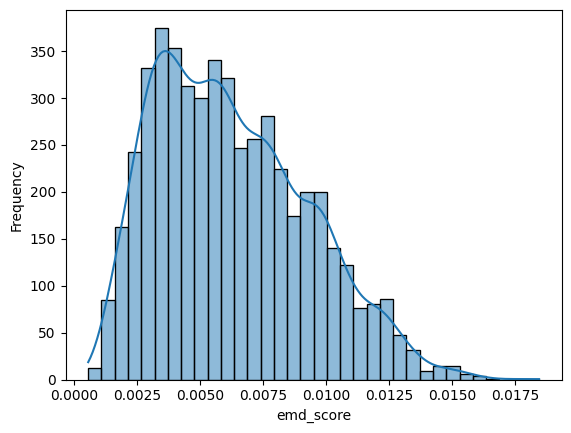

In [ ]:
sns.histplot(column_data, kde=True)
plt.xlabel('emd_score')  # Set the x-axis label to your column's name
plt.ylabel('Frequency')    # Set the y-axis label
plt.show()

In [ ]:
import numpy as np


# Log transform
log_transformed_data = np.log(column_data)

min_val = np.min(log_transformed_data)
max_val = np.max(log_transformed_data)


scaled_values = (log_transformed_data - min_val) / (max_val - min_val)

# Verify the results
print(f"Original range: [{min_val}, {max_val}]")
print(f"Scaled range: [{scaled_values.min()}, {scaled_values.max()}]")


Original range: [-7.474862721646301, -3.9923918933971856]
Scaled range: [0.0, 1.0]


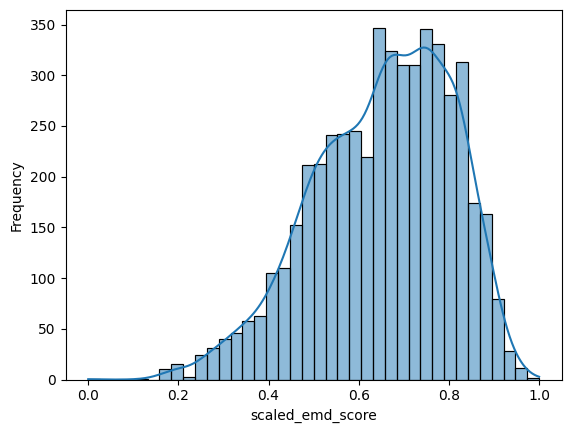

In [ ]:
sns.histplot(scaled_values, kde=True)
plt.xlabel('scaled_emd_score')  # Set the x-axis label to your column's name
plt.ylabel('Frequency')    # Set the y-axis label
plt.show()

### create new column in the dataframe of normalised values - include in publication

In [ ]:
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/hal2p/one-v-all_EMD_dx_SAL1-HAL2.csv')

# Calculate the minimum and maximum values of the 'emd_score' column
# Log transform
log_transformed_data = np.log(column_data)

min_val = np.min(log_transformed_data)
max_val = np.max(log_transformed_data)


scaled_values = (log_transformed_data - min_val) / (max_val - min_val)

df['scaled_emd_score'] = scaled_values
df2 = df[['id2', 'pH2', 'scaled_emd_score', 'ref_protein']]

df.to_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/hal2p/one-v-all_EMD_dx_SAL1-HAL2_norm.csv', index=False)
df2.to_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/hal2p/one-v-all_EMD_dx_SAL1-HAL2_norm_2.csv', index=False)

### Change the results csv for visulisation on phylogeny 

In [13]:
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/AtSAL1_ScHAL2-one-v-all_EMD.csv')

# Assuming the columns in your CSV are named 'ID', 'Condition', and 'Score'
# Step 2: Pivot the DataFrame
df_pivot = df.pivot(index='id2', columns=['pH2', 'ref_protein'], values='emd_score')

# Rename the columns to include 'score_' prefix
df_pivot.columns = [f'pH-{col}' for col in df_pivot.columns]

# Step 3: Reset the index to turn the 'ID' index into a column
df_pivot.reset_index(inplace=True)

print(df_pivot)


        id2  pH-('7_0', 'AtSAL1_updated-pH_7_6')  \
0     10029                             0.005142   
1     10086                             0.003430   
2     10276                             0.006173   
3     10748                             0.010092   
4     10972                             0.010282   
..      ...                                  ...   
500   AtAHL                             0.002736   
501  AtSAL1                             0.004041   
502  AtSAL2                             0.005270   
503  AtSAL3                             0.012906   
504  AtSAL4                             0.003481   

     pH-('7_3', 'AtSAL1_updated-pH_7_6')  pH-('7_6', 'AtSAL1_updated-pH_7_6')  \
0                               0.003467                             0.001930   
1                               0.003430                             0.003430   
2                               0.006173                             0.006173   
3                               0.010092           

In [14]:
df_pivot.columns

Index(['id2', 'pH-('7_0', 'AtSAL1_updated-pH_7_6')',
       'pH-('7_3', 'AtSAL1_updated-pH_7_6')',
       'pH-('7_6', 'AtSAL1_updated-pH_7_6')',
       'pH-('7_9', 'AtSAL1_updated-pH_7_6')',
       'pH-('8_2', 'AtSAL1_updated-pH_7_6')',
       'pH-('7_0', 'AtSAL1_updated-pH_7_9')',
       'pH-('7_3', 'AtSAL1_updated-pH_7_9')',
       'pH-('7_6', 'AtSAL1_updated-pH_7_9')',
       'pH-('7_9', 'AtSAL1_updated-pH_7_9')',
       'pH-('8_2', 'AtSAL1_updated-pH_7_9')',
       'pH-('7_0', 'AtSAL1_updated-pH_8_2')',
       'pH-('7_3', 'AtSAL1_updated-pH_8_2')',
       'pH-('7_6', 'AtSAL1_updated-pH_8_2')',
       'pH-('7_9', 'AtSAL1_updated-pH_8_2')',
       'pH-('8_2', 'AtSAL1_updated-pH_8_2')', 'pH-('7_0', '1ka1_hal2-pH_7_6')',
       'pH-('7_3', '1ka1_hal2-pH_7_6')', 'pH-('7_6', '1ka1_hal2-pH_7_6')',
       'pH-('7_9', '1ka1_hal2-pH_7_6')', 'pH-('8_2', '1ka1_hal2-pH_7_6')',
       'pH-('7_0', '1ka1_hal2-pH_7_9')', 'pH-('7_3', '1ka1_hal2-pH_7_9')',
       'pH-('7_6', '1ka1_hal2-pH_7_9')', 'pH

In [17]:
df_pivot.columns = ['unid', 
       'pH-7_0-AtSAL1-pH_7_6',
       'pH-7_3-AtSAL1-pH_7_6',
       'pH-7_6-AtSAL1-pH_7_6',
       'pH-7_9-AtSAL1-pH_7_6',
       'pH-8_2-AtSAL1-pH_7_6',
       'pH-7_0-AtSAL1-pH_7_9',
       'pH-7_3-AtSAL1-pH_7_9',
       'pH-7_6-AtSAL1-pH_7_9',
       'pH-7_9-AtSAL1-pH_7_9',
       'pH-8_2-AtSAL1-pH_7_9',
       'pH-7_0-AtSAL1-pH_8_2',
       'pH-7_3-AtSAL1-pH_8_2',
       'pH-7_6-AtSAL1-pH_8_2',
       'pH-7_9-AtSAL1-pH_8_2',
       'pH-8_2-AtSAL1-pH_8_2', 
       'pH-7_0-ScHAL2-pH_7_6',
       'pH-7_3-ScHAL2-pH_7_6', 
       'pH-7_6-ScHAL2-pH_7_6',
       'pH-7_9-ScHAL2-pH_7_6', 
       'pH-8_2-ScHAL2-pH_7_6',
       'pH-7_0-ScHAL2-pH_7_9', 
       'pH-7_3-ScHAL2-pH_7_9',
       'pH-7_6-ScHAL2-pH_7_9', 
       'pH-7_9-ScHAL2-pH_7_9',
       'pH-8_2-ScHAL2-pH_7_9', 
       'pH-7_0-ScHAL2-pH_8_2',
       'pH-7_3-ScHAL2-pH_8_2', 
       'pH-7_6-ScHAL2-pH_8_2',
       'pH-7_9-ScHAL2-pH_8_2', 
       'pH-8_2-ScHAL2-pH_8_2']
df_pivot.to_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/AtSAL1_ScHAL2-one-v-all_EMD_2.csv', index=False)

## Find the pLDDT scores of the active sites

In [ ]:
import os
from concurrent.futures import ProcessPoolExecutor
from Bio.PDB import PDBParser, PDBIO, Select
import numpy as np
import pandas as pd

def find_b_factors(pdb_file, output_dir):
    """
    Find atoms within a specified rectangular prism in a PDB file and calculate their mean B-factor (pLDDT).

    Parameters:
    pdb_file (str): Path to the input PDB file.
    output_dir (str): Directory to save the output PDB file.

    Returns:
    tuple: (short_name, mean_b_factor, std_error) for the processed PDB file.
    """

    def compute_bounding_box(corner_coords):
        """
        Compute the bounding box from corner coordinates.

        Parameters:
        corner_coords (numpy.ndarray): Array of corner coordinates.

        Returns:
        tuple: Minimum and maximum coordinates of the bounding box.
        """
        min_coords = np.min(corner_coords, axis=0)
        max_coords = np.max(corner_coords, axis=0)
        return min_coords, max_coords

    def find_atoms_in_prism(pdb_file, min_coords, max_coords):
        """
        Read the PDB file and extract atoms within the rectangular prism.

        Parameters:
        pdb_file (str): Path to the input PDB file.
        min_coords (numpy.ndarray): Minimum coordinates of the bounding box.
        max_coords (numpy.ndarray): Maximum coordinates of the bounding box.

        Returns:
        tuple: List of atoms within the prism and the structure.
        """
        parser = PDBParser(QUIET=True)
        structure = parser.get_structure('protein', pdb_file)
        
        atoms_in_prism = []

        for model in structure:
            for chain in model:
                for residue in chain:
                    for atom in residue:
                        coord = atom.get_coord()
                        if np.all(coord >= min_coords) and np.all(coord <= max_coords):
                            atoms_in_prism.append(atom)

        return atoms_in_prism, structure

    class AtomsSelect(Select):
        """
        Custom selection class for PDBIO.
        """
        def __init__(self, atoms):
            self.atoms_set = set(atoms)

        def accept_atom(self, atom):
            return atom in self.atoms_set

    def write_atoms_to_pdb(atoms, structure, output_file):
        """
        Write atoms to a new PDB file.

        Parameters:
        atoms (list): List of atoms to write.
        structure (Structure): The structure containing the atoms.
        output_file (str): Path to the output PDB file.
        """
        io = PDBIO()
        io.set_structure(structure)
        io.save(output_file, select=AtomsSelect(atoms))

    def calculate_mean_b_factor(atoms):
        """
        Calculate the mean B-factor of the given atoms.

        Parameters:
        atoms (list): List of atoms.

        Returns:
        tuple: Mean B-factor and standard error, or None if no atoms are found.
        """
        b_factors = [atom.get_bfactor() for atom in atoms]
        if b_factors:
            mean_b_factor = np.mean(b_factors)
            std_deviation = np.std(b_factors, ddof=1)  # Sample standard deviation
            sample_size = len(b_factors)
            std_error = std_deviation / np.sqrt(sample_size)
            return mean_b_factor, std_error
        else:
            return None, None

    # Define the coordinates of the corners of the rectangular prism
    corner_coords = np.array([
        [-43.55064101, -41.4898718, -12.31982906],
        [-26, -45, -17],
        [-21.12, -35.24, -5.29],
        [-38.67295493, -31.73449962, -0.61338245],
        [-43.8596559, -26.06520805, -25.0471327],
        [-26.30901489, -29.57533625, -29.72730364],
        [-21.42901489, -19.81533625, -18.01730364],
        [-38.98196982, -16.30983587, -13.34068609]
    ])

    # Compute the bounding box from the corner coordinates
    min_coords, max_coords = compute_bounding_box(corner_coords)

    # Find atoms within the specified rectangular prism
    atoms, structure = find_atoms_in_prism(pdb_file, min_coords, max_coords)

    # Create the output file path
    short_name = os.path.basename(pdb_file)
    output_pdb_file = os.path.join(output_dir, short_name)

    # Write atoms to a new PDB file
    write_atoms_to_pdb(atoms, structure, output_pdb_file)

    # Calculate mean B-factor
    mean_b_factor, std_error = calculate_mean_b_factor(atoms)
    if mean_b_factor is not None:
        print(f"Mean active site pLDDT for {short_name}: {mean_b_factor}, standard_error {std_error}")
    else:
        print(f"No atoms found within the specified prism in {pdb_file}.")

    short_name = short_name.split('.')[0]

    return short_name, mean_b_factor, std_error

def process_pdb_files(input_dir, output_dir, max_workers=4):
    """
    Process all PDB files in the input directory in parallel and save results to a DataFrame.

    Parameters:
    input_dir (str): Directory containing input PDB files.
    output_dir (str): Directory to save the output PDB files.
    max_workers (int): Maximum number of worker processes.

    Returns:
    pd.DataFrame: DataFrame containing short_name, mean_b_factor, and std_error for each PDB file.
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # List all PDB files in the input directory
    pdb_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.pdb')]

    results = []
    # Process PDB files in parallel
    with ProcessPoolExecutor(max_workers=max_workers) as executor:
        futures = [executor.submit(find_b_factors, pdb_file, output_dir) for pdb_file in pdb_files]
        for future in futures:
            result = future.result()
            results.append(result)

    # Convert results to a pandas DataFrame
    df = pd.DataFrame(results, columns=['short_name', 'mean_b_factor', 'std_error'])
    return df

if __name__ == "__main__":
    input_dir = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/'
    output_dir = '/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/cropped_pdb'

    # Process PDB files using multiple cores
    df = process_pdb_files(input_dir, output_dir)

    # Print the resulting DataFrame
    df.to_csv(f'{input_dir}active_site_pLDDT.csv', index=False)


### Check pLDDT distribution - don't include code in publication

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/active_site_pLDDT.csv')
column_data = df['mean_b_factor']

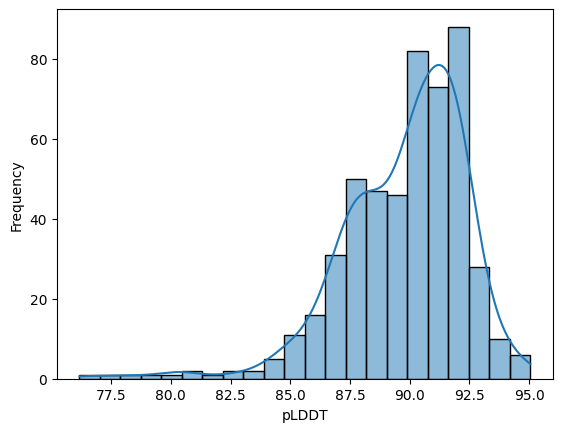

In [ ]:
sns.histplot(column_data, kde=True)
plt.xlabel('pLDDT')  # Set the x-axis label to your column's name
plt.ylabel('Frequency')    # Set the y-axis label
plt.show()

In [ ]:
# Active sites modelled with accuracy below pLDDT 80
df.loc[df['mean_b_factor'] < 80]

,short_name,mean_b_factor,std_error
80,30863,76.176428,0.576875
227,50678,77.396509,0.631230
266,96404,78.451445,0.521628
429,95143,79.429210,0.514830


Full structure pLDDT scores, broken down by paralogue

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def read_list_items(file):
    tip_lst = []
    for i in file:
        i = str(i.strip())
        tip_lst.append(i)

    return tip_lst

In [4]:
with open('/home/mattm/projects/np_paper_structural/20240328_colabfold/tips_by_paralogue/Node_518_SAL_tips.txt', 'r') as SAL:
    sal = read_list_items(SAL)

with open('/home/mattm/projects/np_paper_structural/20240328_colabfold/tips_by_paralogue/Node_677_AHL_tips.txt', 'r') as AHL:
    ahl = read_list_items(AHL)

with open('/home/mattm/projects/np_paper_structural/20240328_colabfold/tips_by_paralogue/Node_863-CNP_tips.txt', 'r') as CNP:
    cnp = read_list_items(CNP)

In [21]:
print(f'SAL: {len(sal)}')
print(f'AHL: {len(ahl)}')
print(f'CNP: {len(cnp)}')

SAL: 160
AHL: 187
CNP: 150


In [5]:
pLDDT_score = pd.read_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/pLDDT_scores.txt', sep='\t')

In [6]:
def categorize_structure(value):
    if value in sal:
        return 'sal'
    elif value in ahl:
        return 'ahl'
    elif value in cnp:
        return 'cnp'
    else:
        return 'unknown'

# Create the new column
pLDDT_score['paralogue'] = pLDDT_score['structure'].apply(categorize_structure)

# Display the result
print(pLDDT_score)

    structure  pLDDT    pTM paralogue
0       50679   87.8  0.899       ahl
1       77157   87.7  0.902       ahl
2       23215   90.0  0.913       cnp
3       91327   92.4  0.925       ahl
4       29668   88.9  0.917       sal
..        ...    ...    ...       ...
500     50213   89.2  0.909       cnp
501     31273   86.9  0.892       cnp
502     49149   92.8  0.925       cnp
503     31442   90.6  0.919       sal
504     47649   85.1  0.893       cnp

[505 rows x 4 columns]


In [7]:
pLDDT_score = pLDDT_score[pLDDT_score['paralogue'] != 'unknown']

pLDDT_score.paralogue.unique()

array(['ahl', 'cnp', 'sal'], dtype=object)

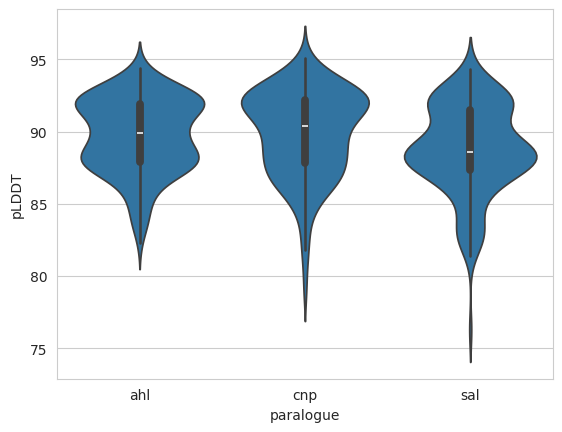

In [8]:
# Set the style for better-looking plots
sns.set_style("whitegrid")

# Violin plot
sns.violinplot(x='paralogue', y='pLDDT', data=pLDDT_score)
plt.xlabel('paralogue')
plt.ylabel('pLDDT')

# Adjust layout and display the plot
plt.show()


Comparison: ahl vs cnp, p-value: 0.9004, Cohen's d: -0.05
Comparison: ahl vs sal, p-value: 0.0059, Cohen's d: 0.34
Comparison: cnp vs sal, p-value: 0.0025, Cohen's d: 0.36


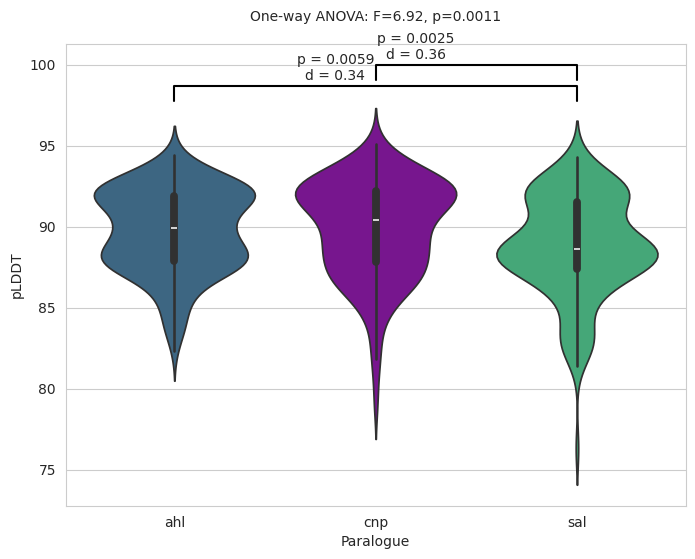

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   ahl    cnp   0.1378 0.9004 -0.6048  0.8804  False
   ahl    sal  -0.9607 0.0059 -1.6903 -0.2311   True
   cnp    sal  -1.0985 0.0025 -1.8685 -0.3285   True
----------------------------------------------------


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pLDDT_score


def cohens_d(group1, group2):
    """Calculate Cohen's d for two groups"""
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_se = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (np.mean(group1) - np.mean(group2)) / pooled_se

# Perform one-way ANOVA
categories = df['paralogue'].unique()
f_statistic, p_value = stats.f_oneway(*[df[df['paralogue'] == category]['pLDDT'] for category in categories])

# Perform Tukey's HSD test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(df['pLDDT'], df['paralogue'])

# Create the violin plot
plt.figure(figsize=(8, 6))
ax = sns.violinplot(x='paralogue', y='pLDDT', data=df, hue='paralogue', palette=['#31688EFF', '#8302a2', '#35B779FF'], legend=False)

# Add ANOVA result
plt.text(0.5, 1.05, f'One-way ANOVA: F={f_statistic:.2f}, p={p_value:.4f}', 
         horizontalalignment='center', transform=ax.transAxes)

# Add significance annotations and Cohen's d
y_max = df['pLDDT'].max()
y_min = df['pLDDT'].min()
y_range = y_max - y_min

for idx, row in enumerate(tukey_results._results_table.data[1:], 1):
    group1, group2 = row[0], row[1]
    p_value = row[3]
    
    # Calculate Cohen's d
    group1_data = df[df['paralogue'] == group1]['pLDDT']
    group2_data = df[df['paralogue'] == group2]['pLDDT']
    d = cohens_d(group1_data, group2_data)
    
    print(f"Comparison: {group1} vs {group2}, p-value: {p_value:.4f}, Cohen's d: {d:.2f}")
    
    if p_value < 0.05:
        try:
            x1, x2 = categories.tolist().index(group1), categories.tolist().index(group2)
            y = y_max + (idx * 0.07 * y_range)
            plt.plot([x1, x1, x2, x2], [y, y + 0.05 * y_range, y + 0.05 * y_range, y], lw=1.5, c='k')
            plt.text((x1 + x2) * 0.4, y + 0.06 * y_range, f'p = {p_value:.4f}\nd = {d:.2f}', ha='center', va='bottom')
        except ValueError as e:
            print(f"Error plotting comparison {group1} vs {group2}: {e}")

plt.xlabel('Paralogue')
plt.ylabel('pLDDT')

# plt.tight_layout()
plt.show()

# Print Tukey's HSD test results
print(tukey_results)

## 

### Heat Map

In [1]:
import pandas as pd
import seaborn as sns

In [10]:
At_v_Sc = pd.read_csv("/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/At_vs_Sc/At_v_Sc_all-v-all_EMD_dx.csv") 

subset_df = At_v_Sc

In [16]:
subset_df = subset_df.loc[(subset_df['id1'].isin(['ScHAL2', 'AtSAL1'])) & (subset_df['id2'].isin(['ScHAL2', 'AtSAL1']))]

In [15]:
subset_df2

basename2,AtAHL-pH_7_0,AtAHL-pH_7_3,AtAHL-pH_7_6,AtAHL-pH_7_9,AtAHL-pH_8_2,AtCNP-pH_7_0,AtCNP-pH_7_3,AtCNP-pH_7_6,AtCNP-pH_7_9,AtCNP-pH_8_2,AtSAL1-pH_7_0,AtSAL1-pH_7_3,AtSAL1-pH_7_6,AtSAL1-pH_7_9,AtSAL1-pH_8_2,ScHAL2-pH_7_0,ScHAL2-pH_7_3,ScHAL2-pH_7_6,ScHAL2-pH_7_9,ScHAL2-pH_8_2
basename1,,,,,,,,,,,,,,,,,,,,
AtAHL-pH_7_0,0.000000,0.000000,0.000000,0.000000,0.002695,0.004700,0.004700,0.004700,0.004700,0.001272,0.006951,0.002798,0.002798,0.002798,0.002798,0.003905,0.003905,0.002881,0.002881,0.002881
AtAHL-pH_7_3,0.000000,0.000000,0.000000,0.000000,0.002695,0.004700,0.004700,0.004700,0.004700,0.001272,0.006951,0.002798,0.002798,0.002798,0.002798,0.003905,0.003905,0.002881,0.002881,0.002881
AtAHL-pH_7_6,0.000000,0.000000,0.000000,0.000000,0.002695,0.004700,0.004700,0.004700,0.004700,0.001272,0.006951,0.002798,0.002798,0.002798,0.002798,0.003905,0.003905,0.002881,0.002881,0.002881
AtAHL-pH_7_9,0.000000,0.000000,0.000000,0.000000,0.002695,0.004700,0.004700,0.004700,0.004700,0.001272,0.006951,0.002798,0.002798,0.002798,0.002798,0.003905,0.003905,0.002881,0.002881,0.002881
AtAHL-pH_8_2,0.002697,0.002697,0.002697,0.002697,0.000000,0.007393,0.007393,0.007393,0.007393,0.003224,0.009560,0.003704,0.003704,0.003704,0.003704,0.006315,0.006315,0.002163,0.002163,0.002163
AtCNP-pH_7_0,0.004345,0.004345,0.004345,0.004345,0.006830,0.000000,0.000000,0.000000,0.000000,0.003922,0.003074,0.004628,0.004628,0.004628,0.004628,0.001885,0.001885,0.006150,0.006150,0.006150
AtCNP-pH_7_3,0.004345,0.004345,0.004345,0.004345,0.006830,0.000000,0.000000,0.000000,0.000000,0.003922,0.003074,0.004628,0.004628,0.004628,0.004628,0.001885,0.001885,0.006150,0.006150,0.006150
AtCNP-pH_7_6,0.004345,0.004345,0.004345,0.004345,0.006830,0.000000,0.000000,0.000000,0.000000,0.003922,0.003074,0.004628,0.004628,0.004628,0.004628,0.001885,0.001885,0.006150,0.006150,0.006150
AtCNP-pH_7_9,0.004345,0.004345,0.004345,0.004345,0.006830,0.000000,0.000000,0.000000,0.000000,0.003922,0.003074,0.004628,0.004628,0.004628,0.004628,0.001885,0.001885,0.006150,0.006150,0.006150


<Axes: xlabel='basename2', ylabel='basename1'>

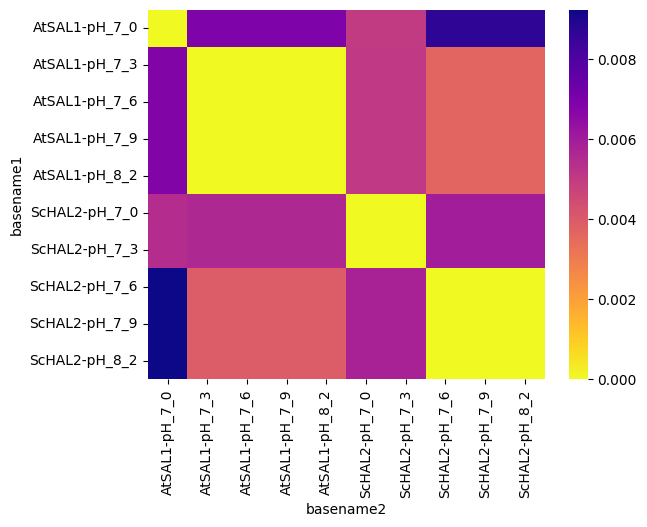

In [18]:
subset_df2 = subset_df.pivot(index="basename1", columns="basename2", values="emd_score")
sns.heatmap(subset_df2, cmap = 'plasma_r')

<Axes: xlabel='basename2', ylabel='basename1'>

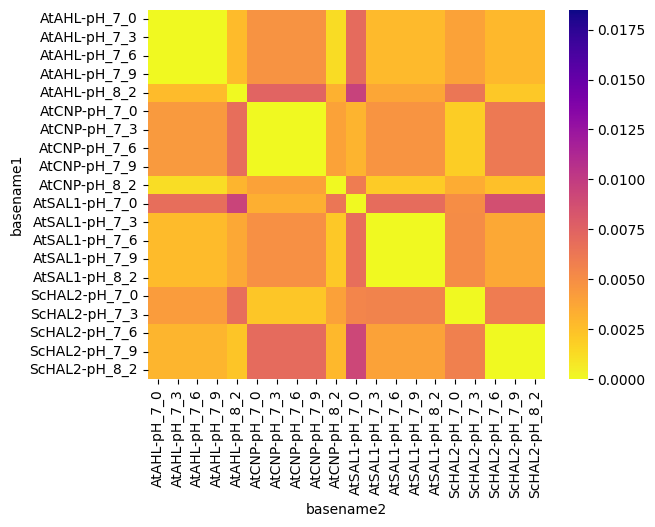

In [11]:
At_v_Sc = At_v_Sc.pivot(index="basename1", columns="basename2", values="emd_score")
sns.heatmap(At_v_Sc, cmap = 'plasma_r', vmin=0, vmax=0.0185)

In [12]:
At_v_Sc

basename2,AtAHL-pH_7_0,AtAHL-pH_7_3,AtAHL-pH_7_6,AtAHL-pH_7_9,AtAHL-pH_8_2,AtCNP-pH_7_0,AtCNP-pH_7_3,AtCNP-pH_7_6,AtCNP-pH_7_9,AtCNP-pH_8_2,AtSAL1-pH_7_0,AtSAL1-pH_7_3,AtSAL1-pH_7_6,AtSAL1-pH_7_9,AtSAL1-pH_8_2,ScHAL2-pH_7_0,ScHAL2-pH_7_3,ScHAL2-pH_7_6,ScHAL2-pH_7_9,ScHAL2-pH_8_2
basename1,,,,,,,,,,,,,,,,,,,,
AtAHL-pH_7_0,0.000000,0.000000,0.000000,0.000000,0.002695,0.004700,0.004700,0.004700,0.004700,0.001272,0.006951,0.002798,0.002798,0.002798,0.002798,0.003905,0.003905,0.002881,0.002881,0.002881
AtAHL-pH_7_3,0.000000,0.000000,0.000000,0.000000,0.002695,0.004700,0.004700,0.004700,0.004700,0.001272,0.006951,0.002798,0.002798,0.002798,0.002798,0.003905,0.003905,0.002881,0.002881,0.002881
AtAHL-pH_7_6,0.000000,0.000000,0.000000,0.000000,0.002695,0.004700,0.004700,0.004700,0.004700,0.001272,0.006951,0.002798,0.002798,0.002798,0.002798,0.003905,0.003905,0.002881,0.002881,0.002881
AtAHL-pH_7_9,0.000000,0.000000,0.000000,0.000000,0.002695,0.004700,0.004700,0.004700,0.004700,0.001272,0.006951,0.002798,0.002798,0.002798,0.002798,0.003905,0.003905,0.002881,0.002881,0.002881
AtAHL-pH_8_2,0.002697,0.002697,0.002697,0.002697,0.000000,0.007393,0.007393,0.007393,0.007393,0.003224,0.009560,0.003704,0.003704,0.003704,0.003704,0.006315,0.006315,0.002163,0.002163,0.002163
AtCNP-pH_7_0,0.004345,0.004345,0.004345,0.004345,0.006830,0.000000,0.000000,0.000000,0.000000,0.003922,0.003074,0.004628,0.004628,0.004628,0.004628,0.001885,0.001885,0.006150,0.006150,0.006150
AtCNP-pH_7_3,0.004345,0.004345,0.004345,0.004345,0.006830,0.000000,0.000000,0.000000,0.000000,0.003922,0.003074,0.004628,0.004628,0.004628,0.004628,0.001885,0.001885,0.006150,0.006150,0.006150
AtCNP-pH_7_6,0.004345,0.004345,0.004345,0.004345,0.006830,0.000000,0.000000,0.000000,0.000000,0.003922,0.003074,0.004628,0.004628,0.004628,0.004628,0.001885,0.001885,0.006150,0.006150,0.006150
AtCNP-pH_7_9,0.004345,0.004345,0.004345,0.004345,0.006830,0.000000,0.000000,0.000000,0.000000,0.003922,0.003074,0.004628,0.004628,0.004628,0.004628,0.001885,0.001885,0.006150,0.006150,0.006150


# Make Network for SSN

In [1]:
"""
Created by Matt Mortimer based off the sequence
cleaner script from BioPython.
26 Oct 21
matthew.mortimer@anu.edu.au
ORCID id: https://orcid.org/0000-0002-8135-9319
Python 3

Version 1.3.3 (211118)
"""

from Bio import SeqIO
from datetime import datetime

# Formats the current date, assigns to variable date
DATE = datetime.now().strftime("%y%m%d")


def cleaner(file, data_source, por_n=0):

    """
    Modification of the sequence cleaner script from BioPython.
    Takes four arguments (one default):
        The fasta file name as a string with the file extension,
        The name of the data source as a sting
        por_n value as the acceptable freq of 'X' residues (default 0)
    Outputs a file with the duplicate sequeces and sequences with 'X' residues
        (exceeding the set freq)
    Summary is outputed to log.
    """

    # Creates 2 dicts and set 2 counters to 0
    sequences = {}  # Dict as a hash table
    duplicate = {}
    dup_count = 0
    d_count = 0

    # Uses the Biopython fasta parse
    for seq_record in SeqIO.parse(file, "fasta"):
        # Take the current sequence
        sequence = str(seq_record.seq).upper()

        # If the sequence passed in the test "is it clean?" and it isn't in
        # the hash table, the sequence and its id are going to be in the hash
        if (float(sequence.count("X")) / float(len(sequence))) * 100 <= por_n:
            if sequence not in sequences:
                sequences[sequence] = seq_record.description
            else:  # Places duplicate sequences into the 'duplicate' dict
                duplicate[sequence] = seq_record.id
                dup_count += 1
        else:  # Places sequences with ambiguous residues into the same dict
            duplicate[sequence] = seq_record.id
            dup_count += 1
            # A count is required to check if some sequences were duplicated
            # multiple times

    # Write the clean sequences
    # Create a file with the cleaned sequences
    with open(f"output/{DATE}_{data_source}_cleaned.fasta", "w+") as output_file:
        # Just read the hash table and write on the file as a fasta format
        # as key and variable
        for sequence in sequences:
            output_file.write(">" + sequences[sequence] + "\n" + sequence + "\n")

    # Creates a file for dropped sequences using the same methods as above but
    # taking the sequences from the 'duplicate' dict.
    with open(
        f"output/{DATE}_{data_source}_cleaner_dropped_seq.fasta", "w+"
    ) as dropped_file:
        for sequence in duplicate:
            dropped_file.write(">" + duplicate[sequence] + "\n" + sequence + "\n")
            d_count += 1

    # Printing and logging the summary
    print(
        f"{len(sequences)} were kept, output was written to {DATE}\
_{data_source}_cleaned.fasta. {d_count} sequences were dropped and \
written to output/{DATE}_{data_source}_cleaner_dropped_seq.fasta"
    )
    print(f"There were {dup_count} instances of duplicate or ambiguous sequences.")

    seq_file = f"output/{DATE}_{data_source}_cleaned.fasta"

    print(seq_file)




In [2]:
cleaner("/home/mattm/projects/np_paper_structural/240626_SSN/240626_SSN_seqs.fasta", "all")

1533 were kept, output was written to 240626_all_cleaned.fasta. 4 sequences were dropped and written to output/240626_all_cleaner_dropped_seq.fasta
There were 4 instances of duplicate or ambiguous sequences.
output/240626_all_cleaned.fasta


In [1]:
"""
Created by Matt Mortimer using code from Matt Spence
26 Oct 21
matthew.mortimer@anu.edu.au
ORCID id: https://orcid.org/0000-0002-8135-9319
Python 3

Version 1.1.2 (211129)
"""

import pandas as pd
import os as os
from datetime import datetime, timedelta
from time import time


def blast(infile, E_value_threshold="10e-10", cpus="2", path=''):
    """
    IMPORTANT: This function assumes blast has been added to the path environment
    Runs BLAST locally using a fasta file to generate the database. A all v.
    all search is then preformed.
    Takes the following arguments:
        blast_path (full dir path for blast)
        infile as a fasta file as a string
        E_value_threshold (default = "10e-10")
        cpus; the number of CPU to use (default 2)
    Outputs a network file which can be viewed in Cytoscape.
    *Modified from code contributed by Matt Spence*
    """
    # Start point for run time calc.
    start = time()

    # Format the date
    date = datetime.now().strftime("%y%m%d")

    # Sets the name for the database files
    db_file = f"output/BLAST/{date}_dataset_db"

    # Make a BLAST database using the non-redundant/annotated sequence dataset
    os.system(f"{path}makeblastdb -in {infile} -dbtype prot -out {db_file}")

    # Perform an all.vs.all BLAST within the database
    outblast = f"{db_file}_blast_{E_value_threshold}"

    # Runs blastp, calling blast+
    os.system(
        f"{path}blastp -db {db_file} -query {infile} \
-outfmt 6 -out {outblast} -evalue {E_value_threshold} -num_threads {cpus}"
    )

    cols = [
        "Query",
        "Target",
        "% Identity",
        "Length",
        "Mistmatch",
        "Gapopen",
        "Qstart",
        "Qend",
        "Sstart",
        "Send",
        "E-value",
        "Bit-score",
    ]

    # Labels columns in a csv and writes to file
    blast_out = pd.read_csv(f"{outblast}", delimiter="\t", names=cols)

    blast_out.to_csv(
        f"output/BLAST/{date}_dataset_network_{E_value_threshold}\
.csv"
    )

    # Run time calc
    end = time()
    elapsed_time = end - start
    f_elapsed_time = str(timedelta(seconds=elapsed_time))
    run_time = f_elapsed_time.split(".")[0]

    # Printing and logging the summary
    print(f"Run time: {run_time} hh:mm:ss")

    print(
        f"Network file output/BLAST/{date}_dataset_network_\
{E_value_threshold}.csv generated"
    )


In [2]:
in_fasta = '/home/mattm/projects/np_paper_structural/240626_SSN/output/240626_all_cleaned.fasta' 

blast(in_fasta, '10e-10', cpus='40')

DATE = '260626'



Building a new DB, current time: 06/26/2024 13:28:50
New DB name:   /home/mattm/projects/np_paper_structural/output/BLAST/240626_dataset_db
New DB title:  /home/mattm/projects/np_paper_structural/240626_SSN/output/240626_all_cleaned.fasta
Sequence type: Protein
Deleted existing Protein BLAST database named /home/mattm/projects/np_paper_structural/output/BLAST/240626_dataset_db
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 1536 sequences in 0.020977 seconds.


/tmp/ipykernel_686809/3522783759.py:67: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  blast_out = pd.read_csv(f"{outblast}", delimiter="\t", names=cols)


Run time: 0:00:53 hh:mm:ss
Network file output/BLAST/240626_dataset_network_10e-10.csv generated


In [29]:
# Set input and output files as variables 
input_network = f'/home/mattm/projects/np_paper_structural/240626_SSN/output/BLAST/240626_dataset_network_10e-10.csv'
input_index = f'/home/mattm/projects/np_paper_structural/240626_SSN/output/BLAST/240626_wrk_index_updated.csv'
output_network = f'/home/mattm/projects/np_paper_structural/240626_SSN/output/BLAST/{DATE}_SSN_10e-10.csv'

# Read the input files
netwrk = pd.read_csv(input_network)
master_index = pd.read_csv(input_index)

# Make a new dataframe for the input_files with a subset of columns, then rename
# the first column of the input_network dataframe so that it can be easily merged 
# with the index file
nw_mod = netwrk[['Query', 'Target', '% Identity', 'Length', 'E-value', 'Bit-score']]
nw_mod.columns = ['Unid', 'Target', '% Identity', 'Length', 'E-value', 'Bit-score']
nw_mod['Unid'] = nw_mod['Unid'].astype("string")

index = master_index[['Unid', 'Species', 'Brief_Classification']]
index['Unid'] = index['Unid'].astype("string")


/tmp/ipykernel_686809/3168359867.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  netwrk = pd.read_csv(input_network)
/tmp/ipykernel_686809/3168359867.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nw_mod['Unid'] = nw_mod['Unid'].astype("string")
/tmp/ipykernel_686809/3168359867.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index['Unid'] = index['Unid'].astype("string")


In [30]:
nw_mod.dtypes

Unid          string[python]
Target                object
% Identity           float64
Length                 int64
E-value              float64
Bit-score            float64
dtype: object

In [31]:
index.dtypes

Unid                    string[python]
Species                         object
Brief_Classification            object
dtype: object

In [32]:
ssn_df = nw_mod.merge(index, on='Unid', how='left')

ssn_df.to_csv(output_network, index=False)

In [33]:
ssn_df

,Unid,Target,% Identity,Length,E-value,Bit-score,Species,Brief_Classification
0,27611,27611,100.000,368,0.000000e+00,753.0,Micromonas_sp.,Mamiellophyceae
1,27611,18271,86.685,368,0.000000e+00,635.0,Micromonas_sp.,Mamiellophyceae
2,27611,95405,79.235,366,0.000000e+00,603.0,Micromonas_sp.,Mamiellophyceae
3,27611,28251,60.743,377,5.630000e-146,414.0,Micromonas_sp.,Mamiellophyceae
4,27611,84068,56.284,366,8.200000e-138,393.0,Micromonas_sp.,Mamiellophyceae
...,...,...,...,...,...,...,...,...
754095,AT4G39120.1,67548,28.261,138,1.260000e-10,56.2,Arabidopsis_thaliana,CoreEudicots/Rosids
754096,AT4G39120.1,85977,27.778,126,1.910000e-10,55.8,Arabidopsis_thaliana,CoreEudicots/Rosids
754097,AT4G39120.1,32778,29.496,139,3.780000e-10,54.7,Arabidopsis_thaliana,CoreEudicots/Rosids
754098,AT4G39120.1,95737,26.613,124,5.280000e-10,54.3,Arabidopsis_thaliana,CoreEudicots/Rosids


In [13]:
import pandas as pd

old = pd.read_csv('/home/mattm/projects/np_paper_structural/240626_SSN/output/BLAST/master_index_w_outg_controls.csv')
new = pd.read_csv('/home/mattm/projects/np_paper_structural/240626_SSN/output/BLAST/240626_wrk_index_updated.csv')

old['Unid'] = old['Unid'].astype("string")
new['Unid'] = new['Unid'].astype("string")

old_mod = (old.merge(new, on='Unid', how='left', indicator=True)
     .query('_merge == "left_only"')
     .drop('_merge', axis=1))



In [14]:
old_mod.to_csv('/home/mattm/projects/np_paper_structural/240626_SSN/output/BLAST/check.csv', index=False)

In [15]:
old_mod.columns

Index(['PACid_x', 'Unid', 'SAL_variant', 'Datasource_x', 'Header_x',
       'Sequence_x', 'Species_x', 'Onekp_index_id_x', 'Scaffold_x', 'Tax_1_x',
       'Tax_2_x', 'Subject Seq-id_x', 'PACid_y', 'Species_y',
       'Brief_Classification', 'Classification', 'Very_Brief_Classification',
       'Full_Classification', 'Datasource_y', 'Header_y', 'Sequence_y',
       'Onekp_index_id_y', 'Scaffold_y', 'Tax_1_y', 'Tax_2_y',
       'Subject Seq-id_y'],
      dtype='object')

In [16]:
old_mod = old_mod[['Unid', 'Header_x', 'Sequence_x', 'Species_x', 'Tax_1_x',
       'Tax_2_x', 'Subject Seq-id_x']]

old_mod.columns = ['Unid', 'Header', 'Sequence', 'Species', 'Tax_1',
       'Tax_2', 'Seq-id']


new = new[['Unid', 'Header', 'Sequence', 'Species', 'Brief_Classification', 'Tax_1', 'Tax_2',
       'Subject Seq-id']]

new.columns = ['Unid', 'Header', 'Sequence', 'Species', 'Brief_Classification', 'Tax_1', 'Tax_2',
       'Seq-id']

concat with the updated wrking index

In [17]:
full = pd.concat([new, old_mod])
full

,Unid,Header,Sequence,Species,Brief_Classification,Tax_1,Tax_2,Seq-id
0,79283,>79283 gnl|onekp|MGBF_scaffold_2010030 Acacia_...,WLTMETEKYAKELEVAVRVVHVACALCGRVQERLFSVGDDHVMSKD...,Acacia_pycnantha,CoreEudicots/Rosids,Core_Eudicots/Rosids,Fabaceae,gnl|onekp|MGBF_scaffold_2010030
1,37580,>37580 gnl|onekp|MGBF_scaffold_2063174 Acacia_...,LNIRSSLPLPVKKAKYNKELEAAVDAVEKACRLCVDVKASLFSSDG...,Acacia_pycnantha,CoreEudicots/Rosids,Core_Eudicots/Rosids,Fabaceae,gnl|onekp|MGBF_scaffold_2063174
2,60720,>60720 gnl|onekp|BMJR_scaffold_2061134 Adiantu...,SYEHELHLAVRAARLAARLCQTVQKKLLTKETQSKADKSPVTVADY...,Adiantum_raddianum,LeptosporangiateMonilophytes,Leptosporangiate_Monilophytes,Pteridaceae,gnl|onekp|BMJR_scaffold_2061134
3,99841,>99841 gnl|onekp|BMJR_scaffold_2009359 Adiantu...,RLFQGNYDQELEVAVRAVQLACILTQRTQERILRNEEKAGSKTDRS...,Adiantum_raddianum,LeptosporangiateMonilophytes,Leptosporangiate_Monilophytes,Pteridaceae,gnl|onekp|BMJR_scaffold_2009359
4,15943,>15943 gnl|onekp|GBCQ_scaffold_2001355 Aerva_p...,EKYSQELDVAVKAVQLACSLCQRVQQNLISTSSSLVQSKDDNSLVT...,Aerva_persica,CoreEudicots_Caryophyllales,Core_Eudicots,Amaranthaceae,gnl|onekp|GBCQ_scaffold_2001355
...,...,...,...,...,...,...,...,...
30795,87894,NaN,MGQRPGPVLSAVAVLGQVAKRKVAWLPRWKAVTRTETAGNSSGVYG...,Pan_troglodytes,NaN,Mammalian,NaN,NaN
30796,27803,NaN,MKMADPWQECMDYAVTLARRAGEVVCEALKNEMNVMLKSSPVDLVT...,Papio_anubis,NaN,Mammalian,NaN,NaN
30797,23604,NaN,MADPWQECMDYAVTLARQAGEVVCEALKNEMNVMLKSSPVDLVTAT...,Macaca_fascicularis,NaN,NaN,NaN,NaN
30798,49932,NaN,MADPWQECMDYAVTLARQAGEVVREAIKNEMNVMVKSSPADLVTAT...,Felis_catus,NaN,Mammalian,NaN,NaN


In [19]:
full.to_csv('/home/mattm/projects/np_paper_structural/240626_SSN/output/BLAST/240628_master_index_updated.csv', index=False)

Below is just taking the SAL cluster from the SSN and checking the taxonomy to make sure none are in red algae or glycophyta. There are some in there, but they fall in the outgroup or AHL/CNP in the phylogeny. 

In [2]:
df = pd.read_csv('/home/mattm/projects/np_paper_structural/240626_SSN/output/BLAST/SAL_seqs.csv')

In [11]:
df = df[['name', 'Species']]
df.columns = ['Unid', 'Species']

In [7]:
index_df = pd.read_csv('/home/mattm/projects/np_paper_structural/240626_SSN/output/BLAST/240628_master_index_updated.csv')

In [10]:
index_df = index_df[['Unid', 'Species', 'Brief_Classification', 'Tax_1', 'Tax_2']]
index_df.columns = ['']

In [13]:
merged_df = pd.merge(df, index_df, on='Unid', how='left')

In [14]:
merged_df

,Unid,Species_x,Species_y,Brief_Classification,Tax_1,Tax_2
0,64292,NaN,Ahnfeltiopsis_flabelliformis,NaN,Red_Algae,Phyllophoraceae
1,85050,NaN,Triglochin_maritima,NaN,Monocots,Juncaginaceae
2,47415,NaN,Haemaria_discolor,NaN,Monocots,Orchidaceae
3,40479,NaN,Licania_michauxii,NaN,Core_Eudicots/Rosids,Chrysobalanaceae
4,98289,NaN,Morus_nigra,NaN,Core_Eudicots/Rosids,Moraceae
...,...,...,...,...,...,...
1530,84068,NaN,Monomastix_opisthostigma,NaN,Green_Algae,Monomasticaceae
1531,28251,Dolichomastix_tenuilepis,Dolichomastix_tenuilepis,Mamiellophyceae,Green_Algae,Dolichomastigaceae
1532,95405,Ostreococcus_lucimarinus,Ostreococcus_lucimarinus,Mamiellophyceae,NaN,NaN
1533,18271,Micromonas_pusilla,Micromonas_pusilla,Mamiellophyceae,NaN,NaN


In [16]:
merged_df.to_csv('/home/mattm/projects/np_paper_structural/240626_SSN/output/BLAST/SAL_seqs_w_tax.csv', index='False')